<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSCE604137 • Penambangan Data

Semester Genap 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

## **EKSPLORASI DAN ANALISIS KLASIFIKASI SERTA REGRESI KECELAKAAN LALU LINTAS**

## **Import Library & Load Dataset**

### Dataset yang digunakan sudah ada di Kaggle https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents (sumber asalnya adalah https://data.mendeley.com/datasets/xytv86278f/1) 

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency, skew, kurtosis

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

/kaggle/input/road-traffic-accidents/RTA Dataset.csv
/kaggle/input/road-traffic-accidents/cleaned.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
rta_df = pd.read_csv('/kaggle/input/road-traffic-accidents/RTA Dataset.csv')

############################################END OF SECTION#######################################

## **EDA**

#### Pada bagian ini, akan dipahami informasi umum tiap atribut dan pembentukan mini RQ untuk eksplorasi lebih lanjut.

### **Basic Information Gathering**

####  Pemahaman dasar dari tiap atribut sebelum melakukan analisis lebih lanjut. Informasi yang dicari meliputi:
#### 1. Informasi dasar tiap atribut.
#### 2. Keberadaan nilai duplikat/missing value.

In [3]:
rta_df.head() 

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
print(f"Banyak row : {rta_df.shape[0]}")
print(f"Banyak column : {rta_df.shape[1]}")

Banyak row : 12316
Banyak column : 32


In [5]:
print("Kolom-kolom dari dataset:")
pd.Series(rta_df.columns)

Kolom-kolom dari dataset:


0                            Time
1                     Day_of_week
2              Age_band_of_driver
3                   Sex_of_driver
4               Educational_level
5         Vehicle_driver_relation
6              Driving_experience
7                 Type_of_vehicle
8                Owner_of_vehicle
9         Service_year_of_vehicle
10              Defect_of_vehicle
11          Area_accident_occured
12               Lanes_or_Medians
13                Road_allignment
14              Types_of_Junction
15              Road_surface_type
16        Road_surface_conditions
17               Light_conditions
18             Weather_conditions
19              Type_of_collision
20    Number_of_vehicles_involved
21           Number_of_casualties
22               Vehicle_movement
23                 Casualty_class
24                Sex_of_casualty
25           Age_band_of_casualty
26              Casualty_severity
27              Work_of_casuality
28           Fitness_of_casuality
29            

In [6]:
# Melihat informasi terkait kolom-kolom
rta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
# Melihat deskripsi atribut numerik
rta_df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
# Melihat deskripsi atribut non-numerik
rta_df.describe(include=['O'])

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [9]:
# Melihat keberadaan nilai duplikat
print(f"Jumlah data duplikat: {rta_df.duplicated().sum()}")

Jumlah data duplikat: 0


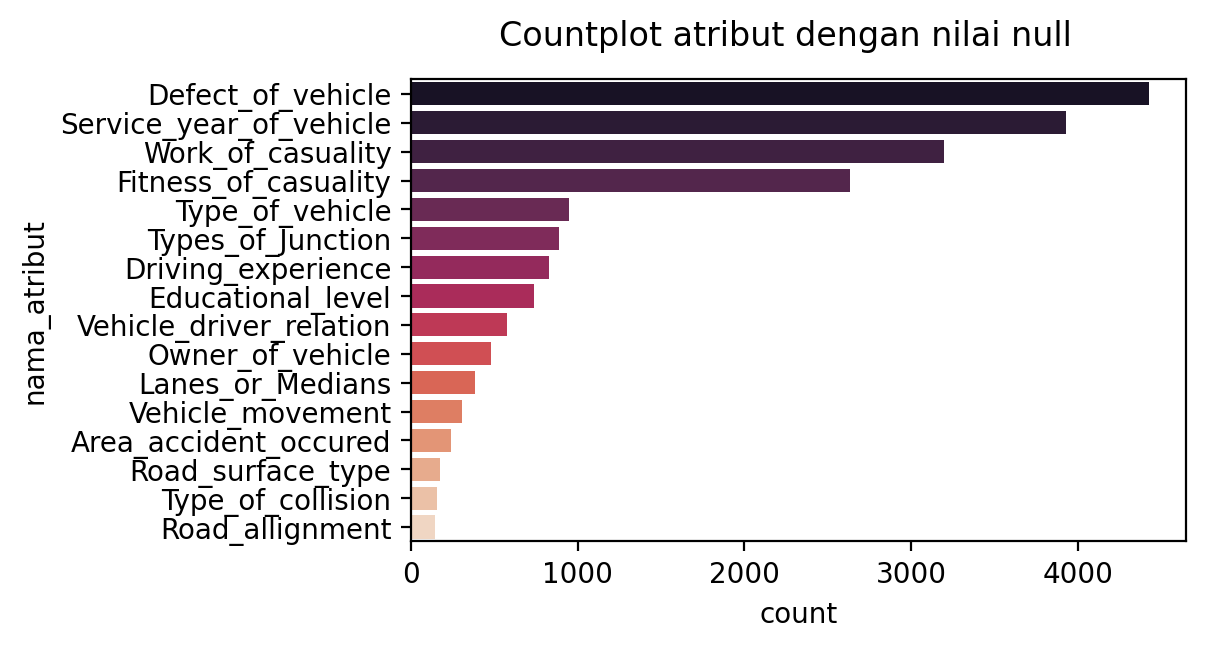

In [10]:
# Visualisasi jumlah null dari tiap kolom
def visualize_null(df):
  nulls = df.isnull().sum().to_frame()
  cols_with_nulls = []

  for column, num_of_nulls in nulls.iterrows():
    if num_of_nulls[0] > 0:
      for i in  range (num_of_nulls[0]):
        cols_with_nulls.append(column)
  nulls = pd.DataFrame(cols_with_nulls)
  nulls.columns = ['nama_atribut']

  plt.figure(figsize=(5, 3))
  plt.suptitle("Countplot atribut dengan nilai null")
  sns.countplot(
      y=nulls['nama_atribut'],
      palette='rocket',
      order=nulls['nama_atribut'].value_counts().index,
  )
  plt.savefig('atribut_null_count.png', bbox_inches='tight')

visualize_null(rta_df)

### **Advanced Analysis of Data**

####  Visualisasi dan analisis statistik untuk memahami hubungan berbagai atribut pada data. Akan dibentuk mini RQ untuk setiap RQ yang terdefinisi sebagai berikut:

#### 1. Faktor-faktor apa saja yang berkorelasi dengan penyebab langsung kecelakaan lalu lintas?
#### 2. Dapatkah diprediksi jumlah kasualitas dari kecelakaan lalu lintas berdasarkan lingkungan kejadiannya?
#### 3. Sejauh mana tingkat keparahan kecelakaan lalu lintas dapat diprediksi secara otomatis?

### **RQ 1**

Faktor-faktor yang diuji korelasinya dengan penyebab langsung adalah faktor-faktor penyebab kecelakaan lainnya yang menurut penelitian berhubungan dengan terjadinya kecelakaan lalu lintas, yaitu informasi kendaraan, cuaca, kondisi pencahayaan, dan kondisi jalan.

#### **Mini RQ 1: Apakah ada korelasi antara informasi kendaraan dengan penyebab langsung kecelakaan? Jika ada, seberapa kuat korelasinya?**

Pertama, akan divisualisasikan bagaimana count plot dari masing-masing variabel informasi kendaraan (Type_of_vehicle, Service_year_of_vehicle, dan Defect_of_vehicle). Kemudian, akan dianalisis dengan uji chi-squared test untuk menyimpulkan adakah bukti yang signifikan secara statistik bahwa memang ada korelasi antara informasi kendaraan dengan penyebab langsung kecelakaan.

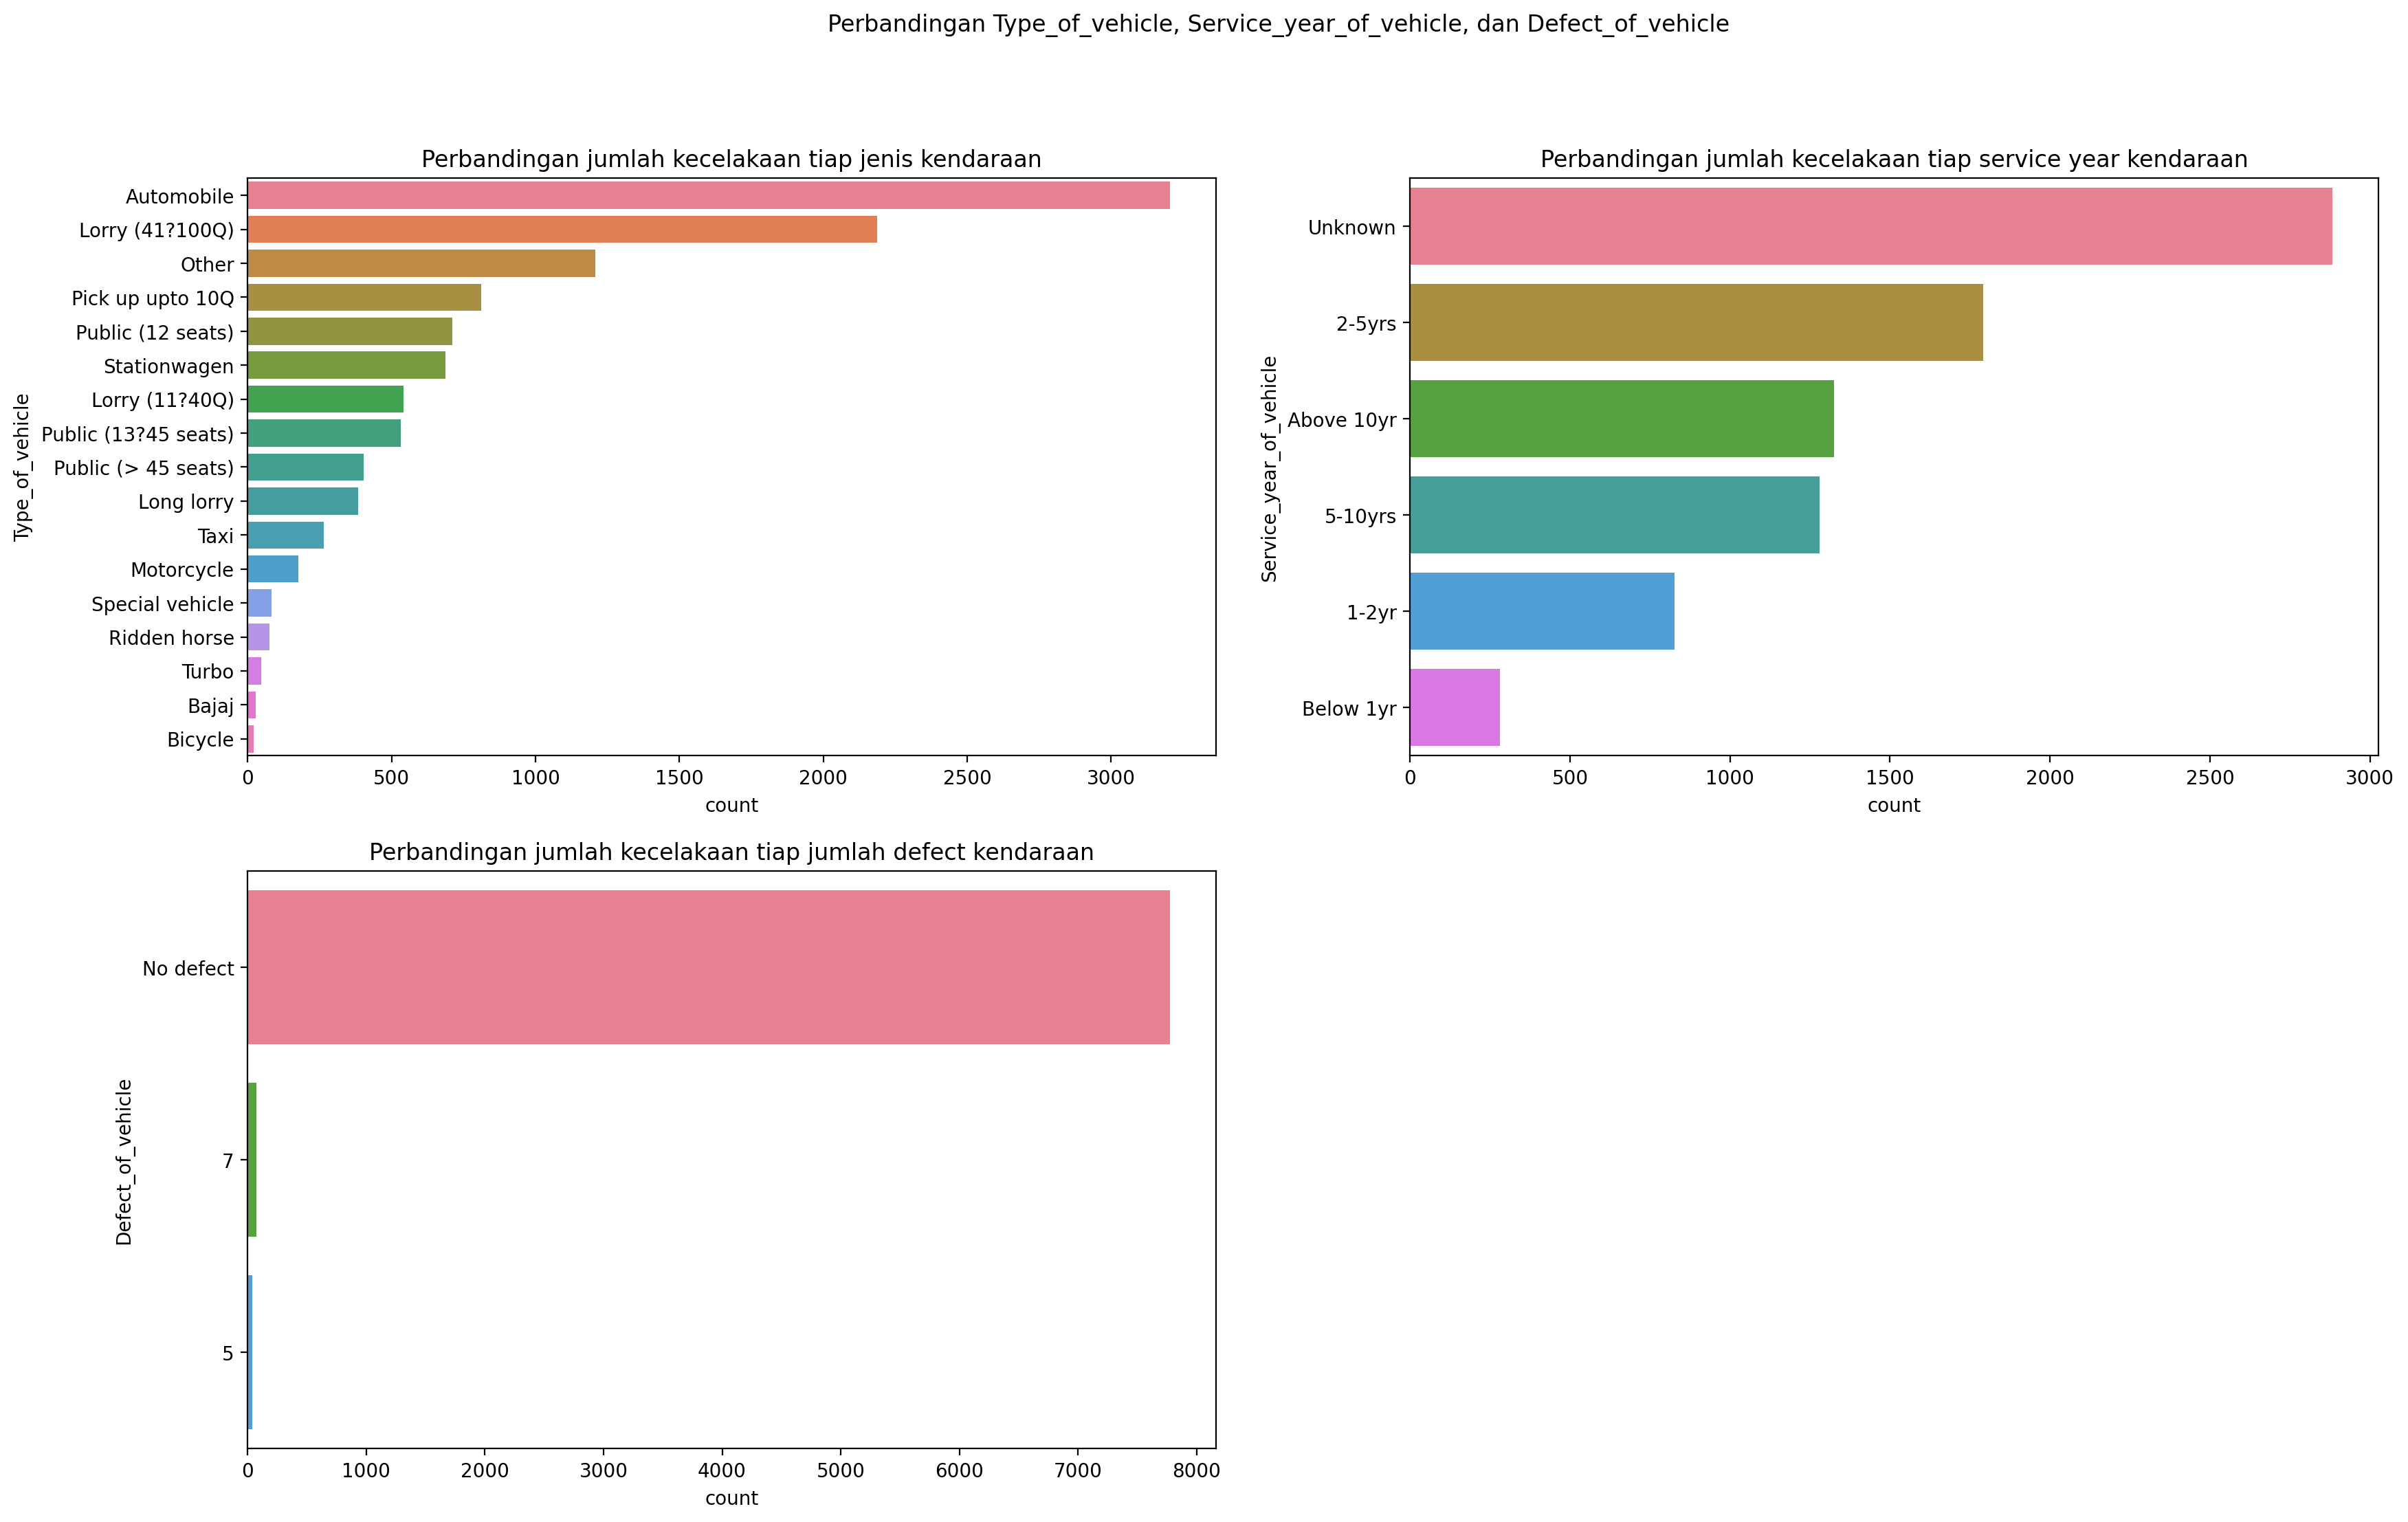

In [11]:
# Visualisasi beberapa informasi kendaraan terhadap jumlah kecelakaan yang terjadi
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.title("Perbandingan jumlah kecelakaan tiap jenis kendaraan")
sns.countplot(
    y=rta_df["Type_of_vehicle"],
    palette='husl',
    order=rta_df['Type_of_vehicle'].value_counts().index
)

plt.subplot(2,2,2)
plt.title("Perbandingan jumlah kecelakaan tiap service year kendaraan")
sns.countplot(
    y=rta_df["Service_year_of_vehicle"],
    palette='husl',
    order=rta_df['Service_year_of_vehicle'].value_counts().index
)

plt.subplot(2,2,3)
plt.title("Perbandingan jumlah kecelakaan tiap jumlah defect kendaraan")
sns.countplot(
    y=rta_df["Defect_of_vehicle"],
    palette='husl',
    order=rta_df['Defect_of_vehicle'].value_counts().index
)

plt.suptitle("Perbandingan Type_of_vehicle, Service_year_of_vehicle, dan Defect_of_vehicle")
plt.savefig('perbandingan_informasi_kendaraan.png', bbox_inches='tight')

Untuk jenis kendaraan dan service year-nya, persebarannya cukup mirip, yaitu ada satu variabel yang terbanyak, lalu diikuti variabel lainnya dengan perbedaan yang secara gradual berkurang. Namun, yang menarik adalah untuk jumlah defect kendaraan yang mayoritas tidak memiliki defect. Dengan informasi tersebut, belum ada kesimpulan yang bisa diambil untuk menjawab mini RQ ini sehingga akan dilakukan uji statistik chi-squared. 

In [12]:
# Membuat contingency table
contigency_table_type = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Type_of_vehicle'])
contigency_table_service_year = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Service_year_of_vehicle'])
contigency_table_defect = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Defect_of_vehicle'])

# Melakukan uji chi-squared
c1, p1, dof1, expected1 = chi2_contingency(contigency_table_type)
c2, p2, dof2, expected2 = chi2_contingency(contigency_table_service_year)
c3, p3, dof3, expected3 = chi2_contingency(contigency_table_defect)

# Mencetak hasilnya
print(f"p-value Type_of_vehicle-Cause_of_accident = {p1}")
print(f"p-value Service_year_of_vehicle-Cause_of_accident = {p2}")
print(f"p-value Defect_of_vehicle-Cause_of_accident = {p3}")

p-value Type_of_vehicle-Cause_of_accident = 0.0006702708607573234
p-value Service_year_of_vehicle-Cause_of_accident = 0.9203993304734359
p-value Defect_of_vehicle-Cause_of_accident = 0.34400593917236444


Bisa dilihat bahwa ada empirical support yang menunjukkan bahwa Type_of_vehicle berkorelasi dengan Cause_of_accident (p-value < 0.05). Dengan demikian, dapat disimpulkan bahwa Type_of_vehicle-lah yang merupakan prediktor terbaik di antara ketiganya untuk memprediksi penyebab kecelakaan (Cause_of_accident). Namun, seberapa kuat korelasinya? Akan dicek menggunakan Cramer's V test.

In [13]:
n = contigency_table_type.sum().sum()
dof = min(contigency_table_type.shape)-1
v = np.sqrt(c1/(n*dof))
print(f"Cramer's value: {v} untuk Degree of Freedom: {dof}")

Cramer's value: 0.04626853560179609 untuk Degree of Freedom: 16


Bisa dilihat bahwa hubungan kedua variabel tidak begitu kuat (relatif terhadap rentang nilainya, yaitu antara 0 dan 1) walaupun memiliki empirical support yang menunjukkan adanya korelasi yang signifikan.

#### **Mini RQ 2: Apakah ada korelasi antara cuaca dengan penyebab langsung kecelakaan? Jika ada, bagaimana seberapa kuat korelasinya?**


Pertama, akan divisualisasikan bagaimana count plot dari cuaca (melihat cuaca mana yang terjadi kecelakaan terbanyak). Kemudian, akan dianalisis dengan uji chi-squared test untuk menyimpulkan adakah bukti yang signifikan secara statistik bahwa memang ada korelasi antara cuaca dengan penyebab langsung kecelakaan.

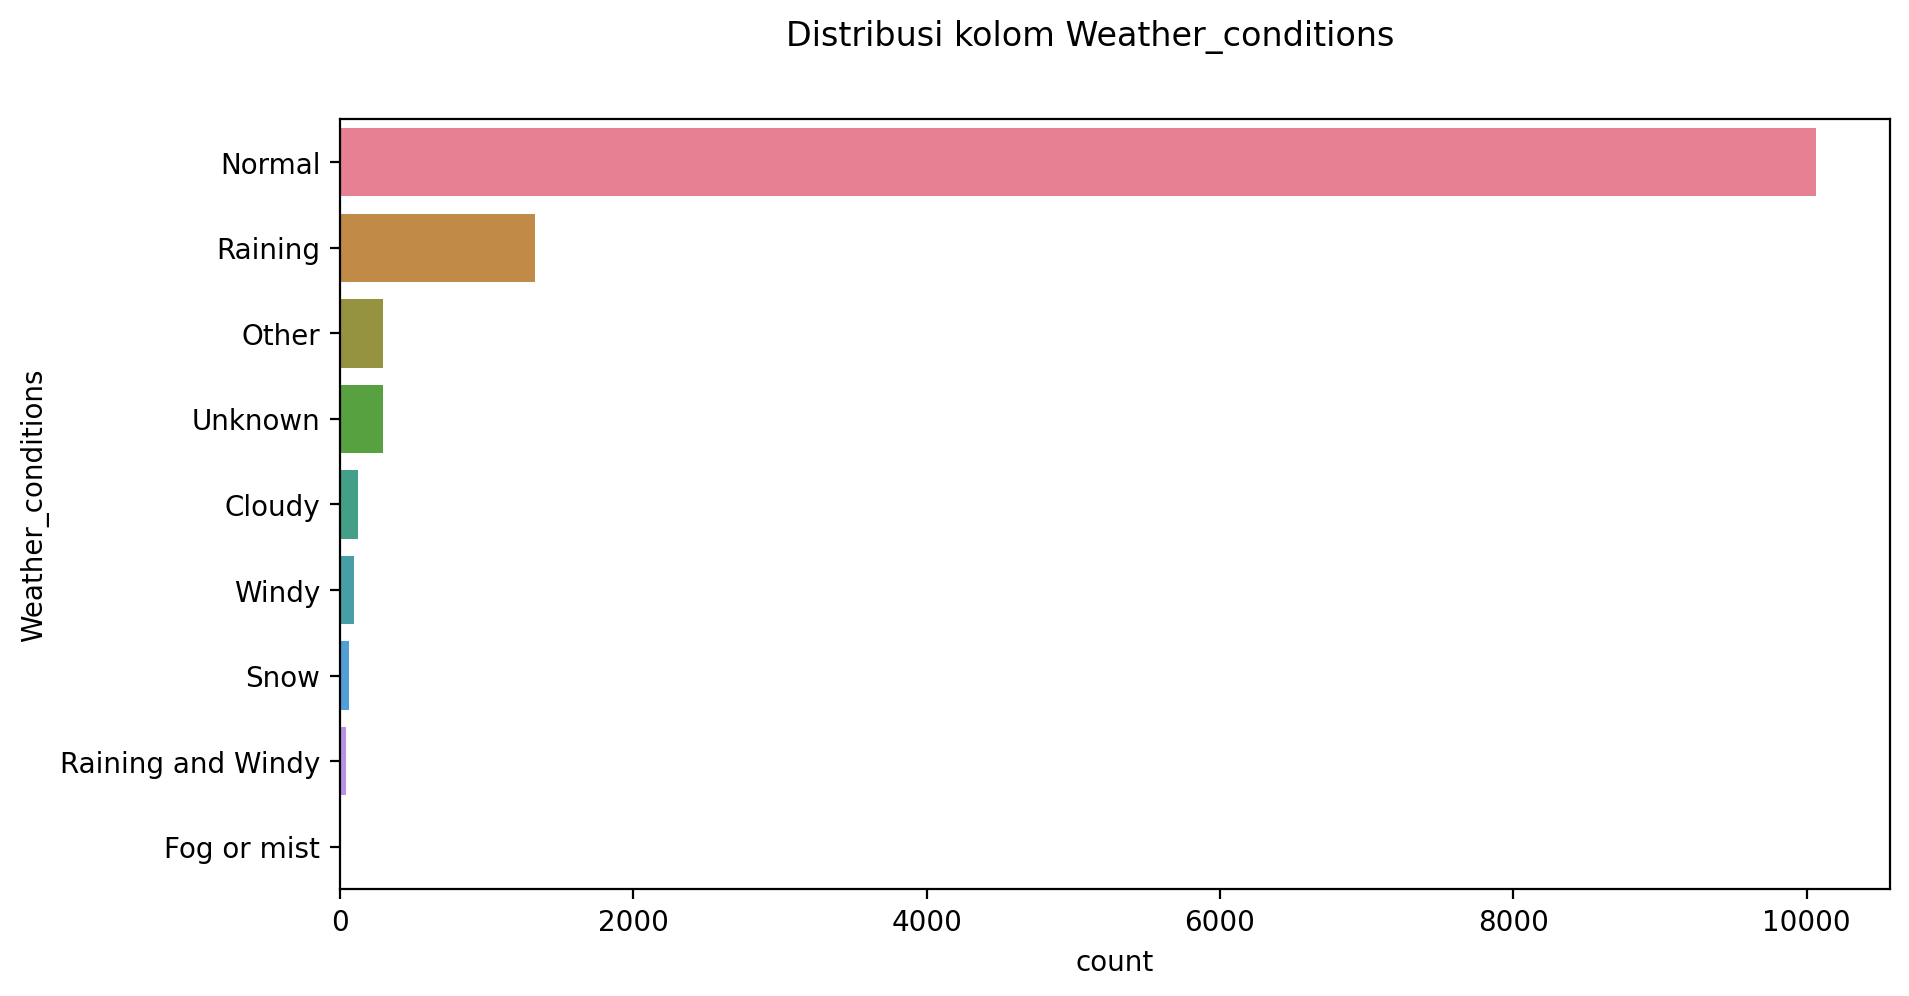

In [14]:
plt.figure(figsize=(10, 5))
plt.suptitle("Distribusi kolom Weather_conditions")
sns.countplot(
    y=rta_df["Weather_conditions"],
    order=rta_df['Weather_conditions'].value_counts().index,
    palette='husl',
)
plt.savefig('distribusi_kolom_weather_conditions.png', bbox_inches='tight')

Ini cukup menarik karena berdasarkan penelitian Fang Wu et al., kondisi hujan dan berawanlah yang paling banyak berkaitan dengan kecelakaan lalu lintas karena mengganggu penglihatan pengemudi dan kondisi jalanan. Perbedaan tersebut bisa jadi karena dataset yang digunakan diambil dari Kota Addis Ababa (berbeda dengan di penelitian Fang Wu et al.) atau memang kecelakaan yang terdaftar di dataset mayoritas saat kondisi normal. Selanjutnya, akan diukur korelasinya menggunakan chi-squared test sesuai dengan skala pengukuran atributnya yang nominal.

In [15]:
# Membuat contingency table
contigency_table = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Weather_conditions'])

# Melakukan uji chi-squared
c, p, dof, expected = chi2_contingency(contigency_table)

# Mencetak hasilnya
print(f"p-value Weather_conditions-Cause_of_accident = {p}")

p-value Weather_conditions-Cause_of_accident = 0.8660222730703279


Bisa dilihat p-value-nya > 0.05 sehingga dapat disimpulkan bahwa tidak ada empirical evidence yang menunjukkan adanya korelasi antara kondisi cuaca dan penyebab langsung kecelakaan.

#### **Mini RQ 3: Apakah ada korelasi antara kondisi pencahayaan dengan penyebab langsung kecelakaan? Jika ada, seberapa kuat korelasinya?**

Menurut penelitian Fang Wu et al., ada hubungan antara kondisi pencahayaan dan kecelakaan. Namun, apakah ada korelasi antara kondisi pencahayaan dengan penyebab langsung kecelakaan? Akan dibuktikan dengan uji chi-squared test juga (sebelumnya akan divisualisasikan distribusi nilai di atributnya).

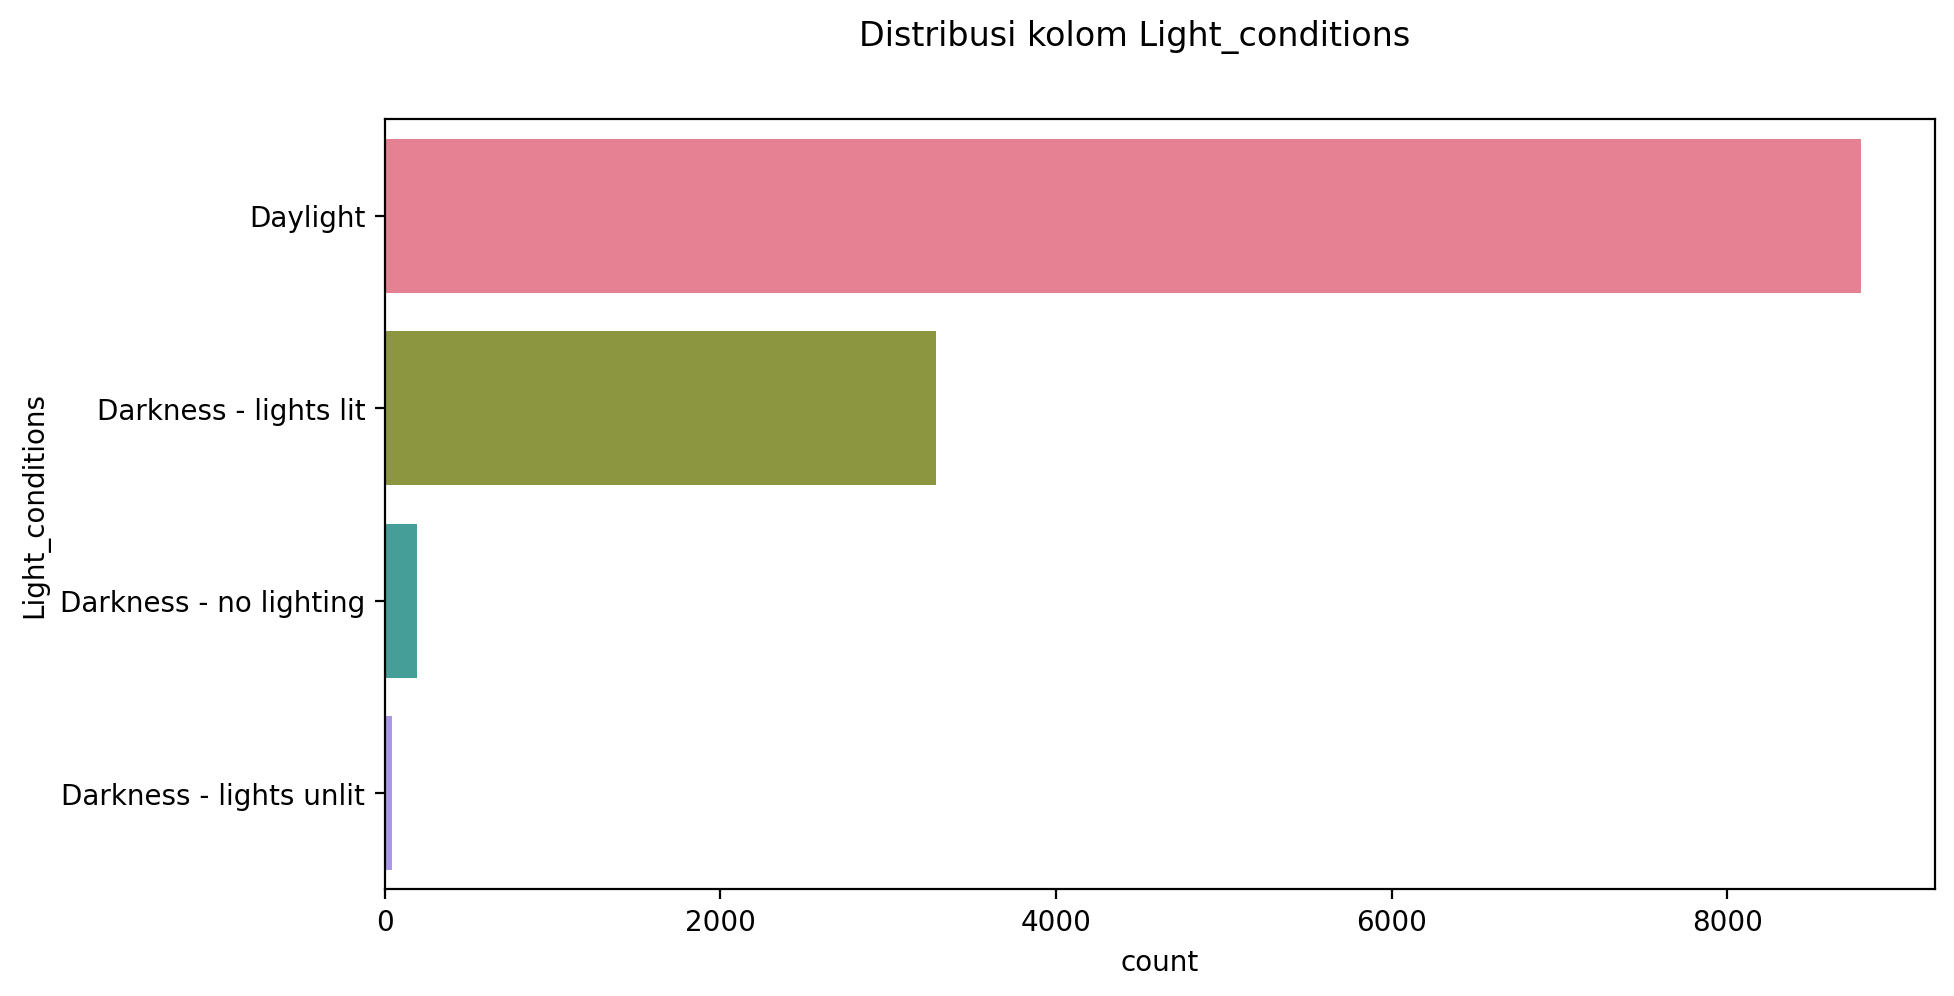

In [16]:
plt.figure(figsize=(10, 5))
plt.suptitle("Distribusi kolom Light_conditions")
sns.countplot(
    y=rta_df["Light_conditions"],
    order=rta_df['Light_conditions'].value_counts().index,
    palette='husl',
)
plt.savefig('distribusi_kolom_light_conditions.png', bbox_inches='tight')

Berdasarkan visualisasi di atas, yang paling banyak terjadi kecelakaan adalah saat kondisi normal. Namun, tidak bisa disimpulkan hal seperti "sinag hari adalah waktu yang paling berkorelasi dengan kecelakaan", diperlukan investigasi lebih mendalam terkait hal ini karena bisa jadi kecelakaan yang terdaftar di dataset tidak menyeluruh. Selain itu, tidak ada kolom yang menunjukkan jumlah fatalitas dari kecelakaan sehingga tidak bisa menguji hasil penelitian Fang Wu et al. yang menyampaikan bahwa saat siang hari jumlah fatalitasnya paling rendah. Selanjutnya, akan diukur korelasinya menggunakan chi-squared test sesuai dengan skala pengukuran atributnya yang nominal.

In [17]:
# Membuat contingency table
contigency_table = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Light_conditions'])

# Melakukan uji chi-squared
c, p, dof, expected = chi2_contingency(contigency_table)

# Mencetak hasilnya
print(f"p-value Light_conditions-Cause_of_accident = {p}")

p-value Light_conditions-Cause_of_accident = 0.26779914489887285


p-value-nya lebih rendah dari saat menguji korelasi cuaca dan penyebab langsung kecelakaan. Namun, tetap > 0.5 sehingga tidak ada empirical evidence yang menunjukkan adanya hubungan signifikan antara kondisi pencahayaan dan penyebab langsung kecelakaan.

#### **Mini RQ 4: Apakah ada korelasi antara kondisi jalan dengan penyebab langsung kecelakaan? Jika ada, seberapa kuat korelasinya?**

Berdasarkan paper Fang Wu et al., disebutkan bahwa kondisi jalan lurus, berkelok, atau miring menjadi kondisi di mana kecelakaan lalu lintas paling banyak terjadi. Akan diuji apakah kondisi jalan yang dilalui kendaraan memiliki korelasi dengan penyebab langsung kecelakaan (sebelumnya akan dilihat bagaimana distribusinya secara visual).

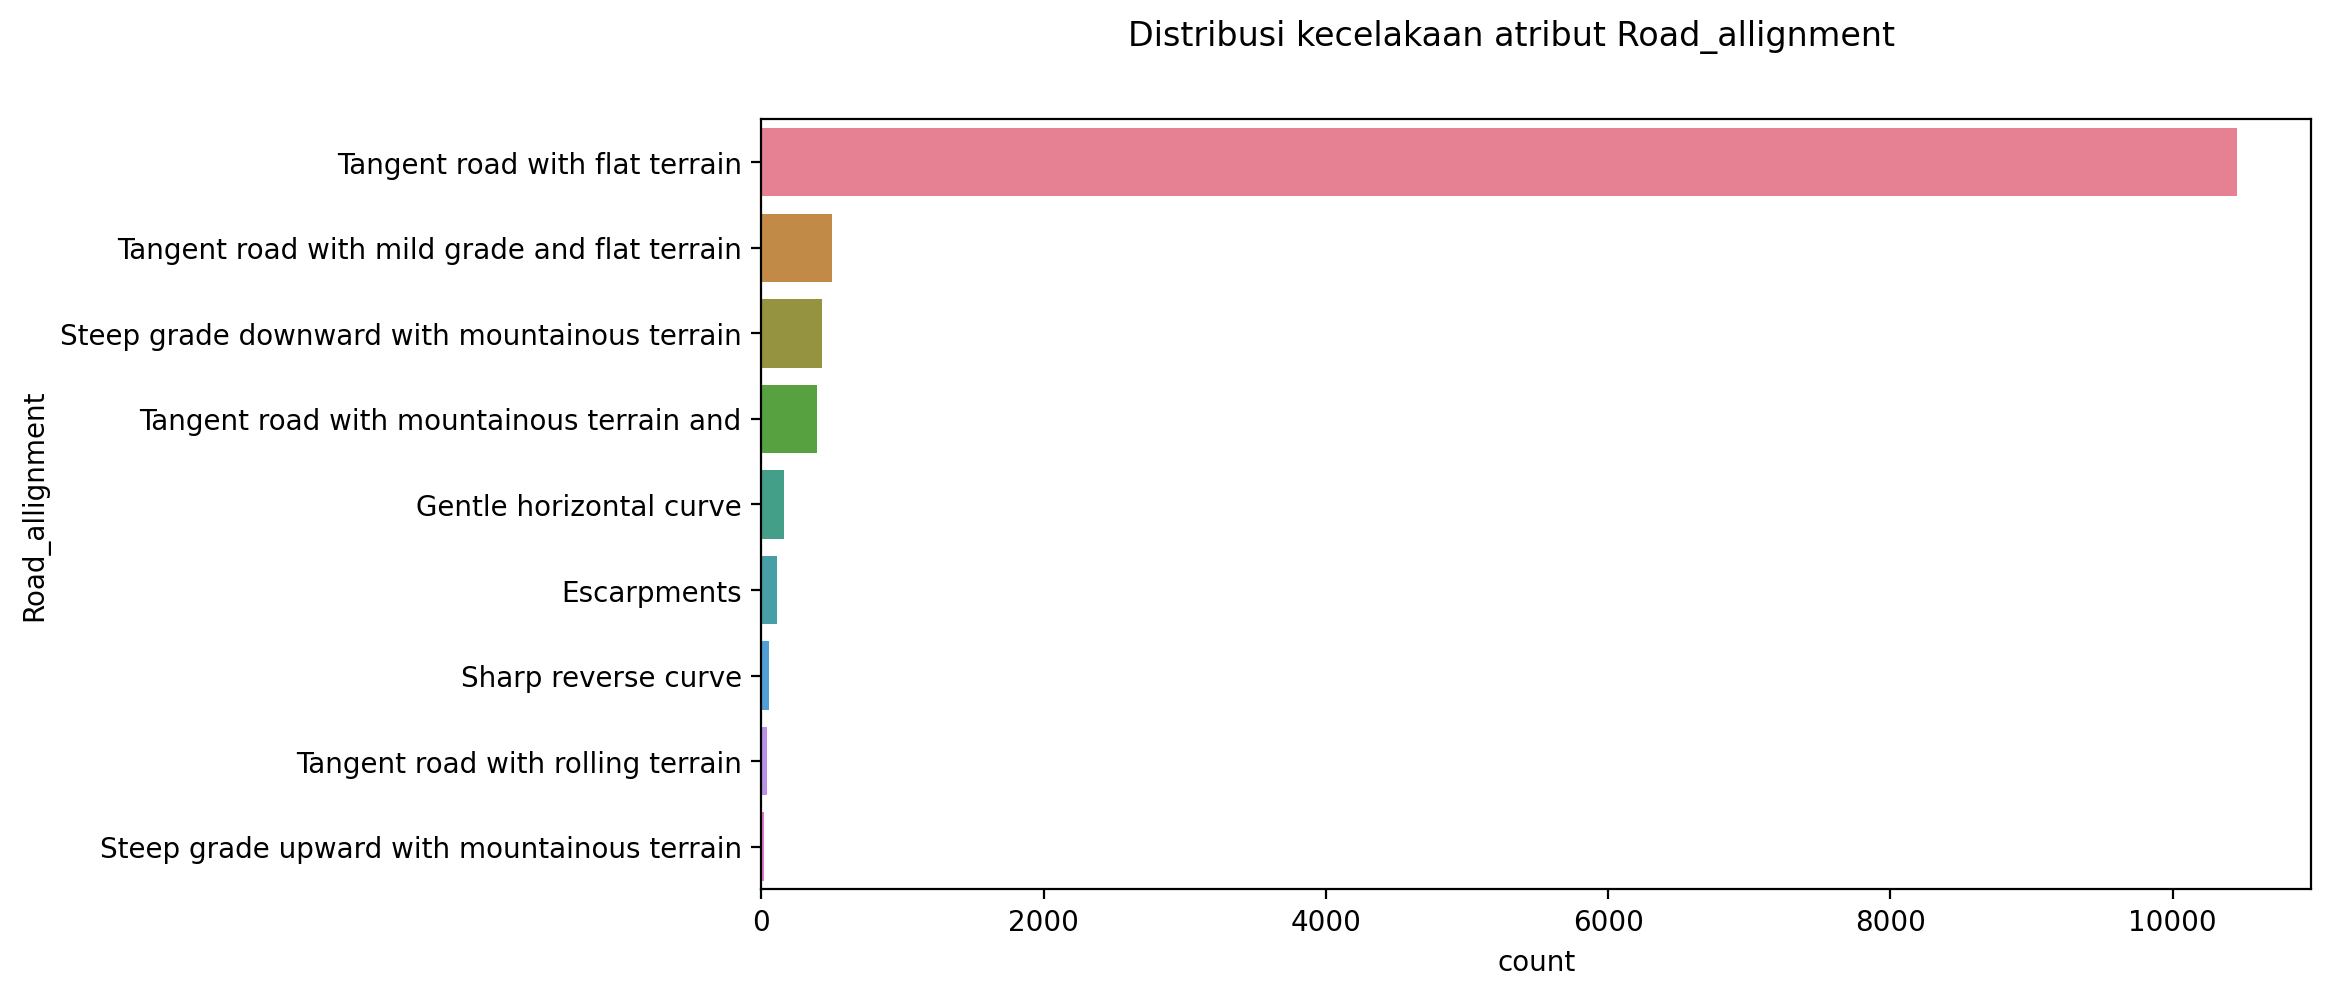

In [18]:
plt.figure(figsize=(10, 5))
plt.suptitle("Distribusi kecelakaan atribut Road_allignment")
sns.countplot(
    y=rta_df["Road_allignment"],
    palette='husl',
    order=rta_df['Road_allignment'].value_counts().index
)
plt.savefig('distribusi_road_allignment.png', bbox_inches='tight')

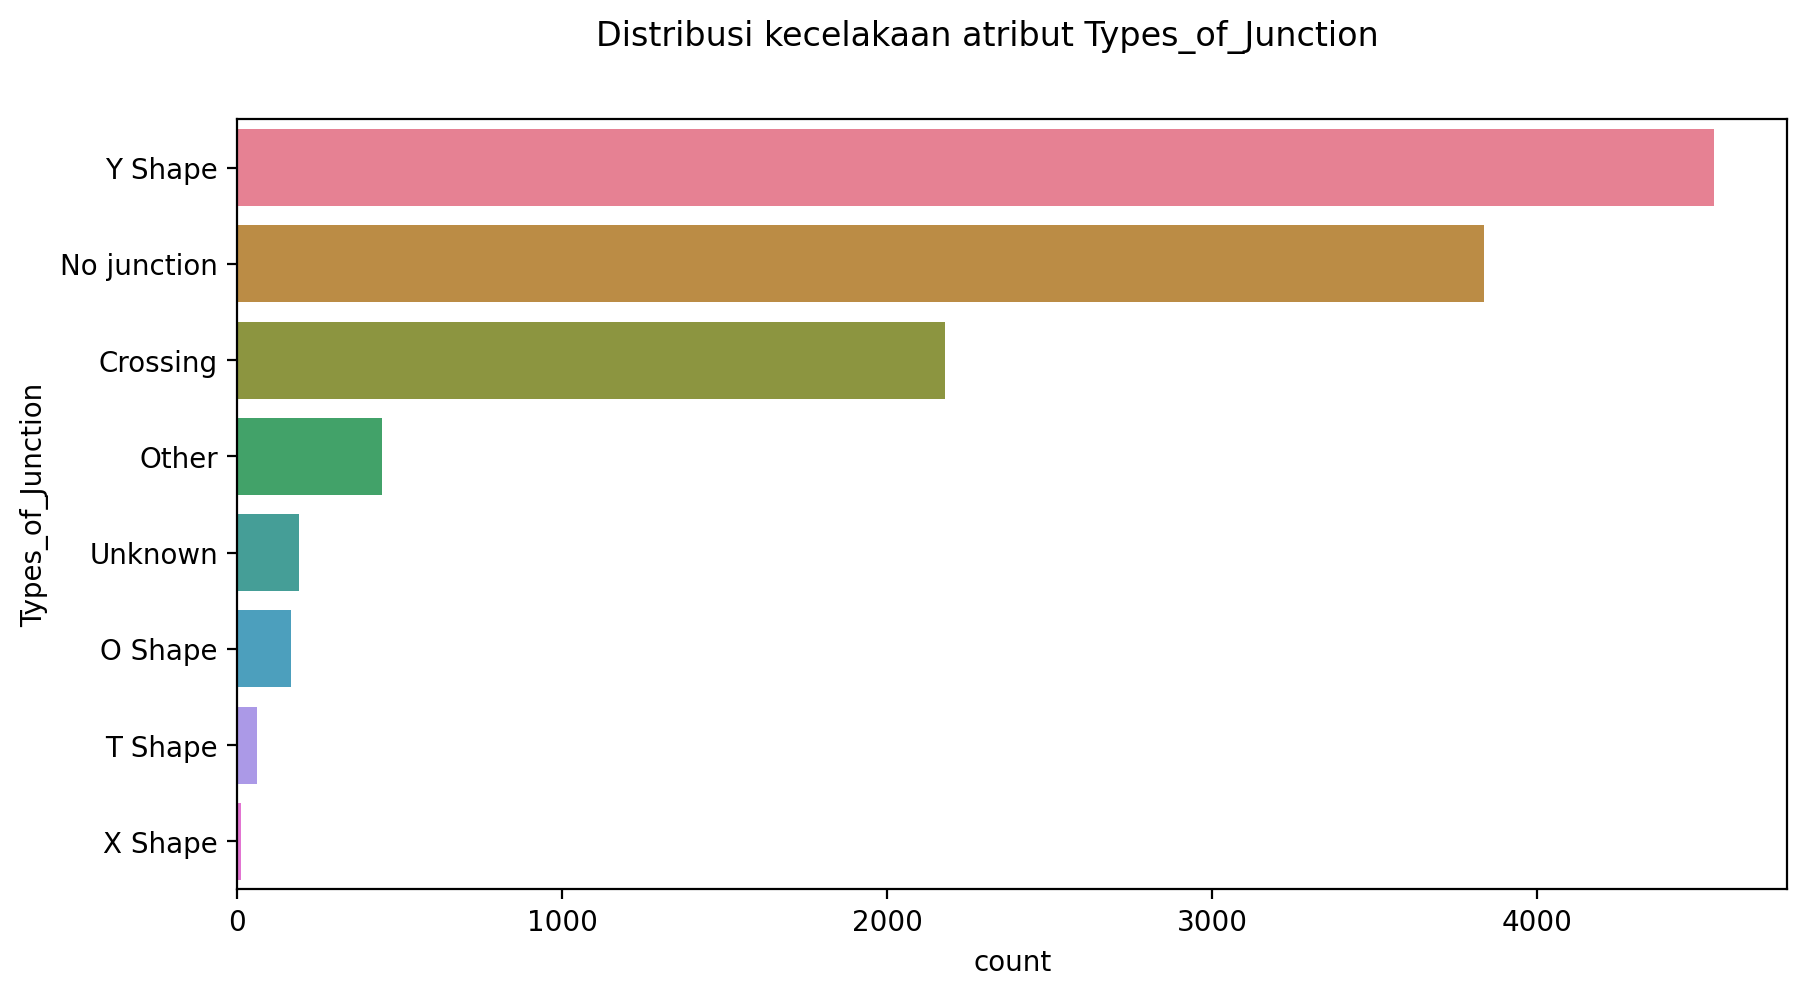

In [19]:
plt.figure(figsize=(10, 5))
plt.suptitle("Distribusi kecelakaan atribut Types_of_Junction")
sns.countplot(
    y=rta_df["Types_of_Junction"],
    palette='husl',
    order=rta_df['Types_of_Junction'].value_counts().index
)
plt.savefig('distribusi_types_of_junction.png', bbox_inches='tight')

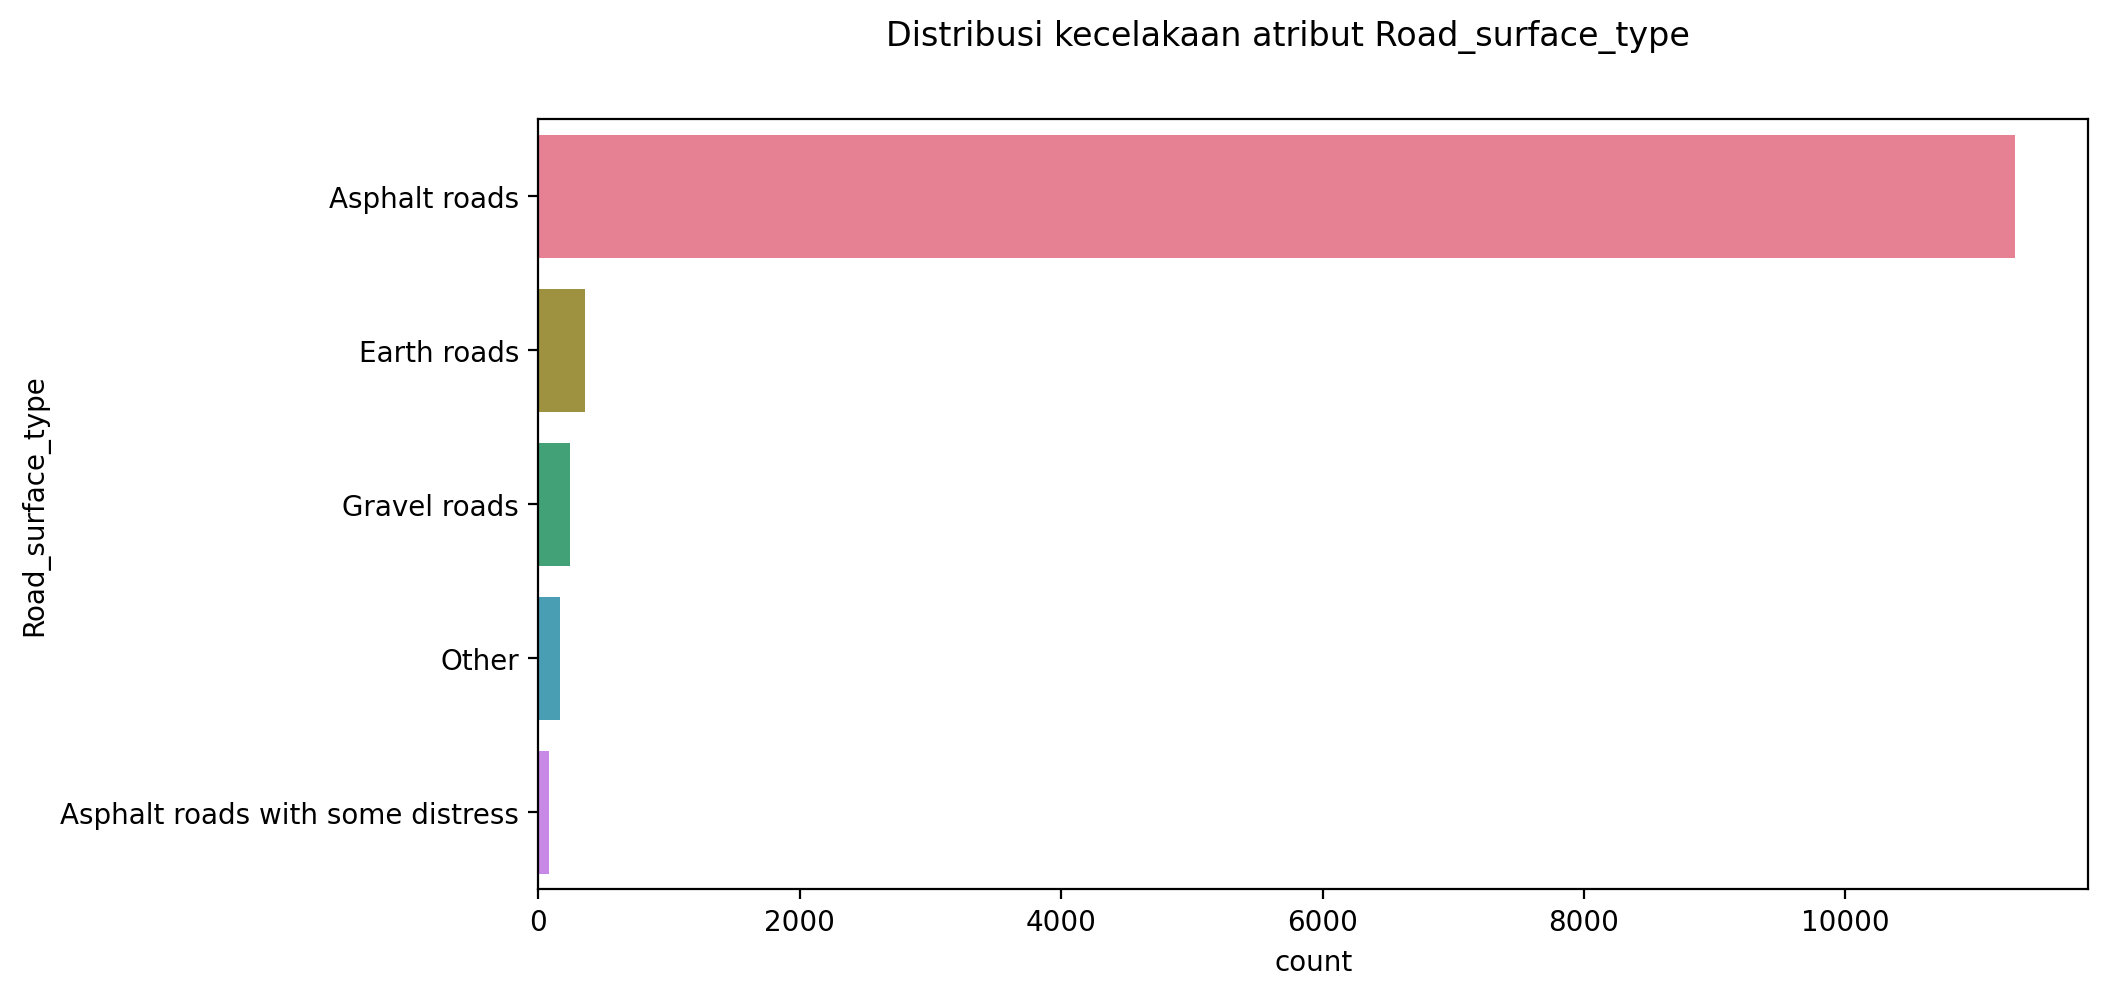

In [20]:
plt.figure(figsize=(10, 5))
plt.suptitle("Distribusi kecelakaan atribut Road_surface_type")
sns.countplot(
    y=rta_df["Road_surface_type"],
    palette='husl',
    order=rta_df['Road_surface_type'].value_counts().index
)
plt.savefig('distribusi_road_surface_type.png', bbox_inches='tight')

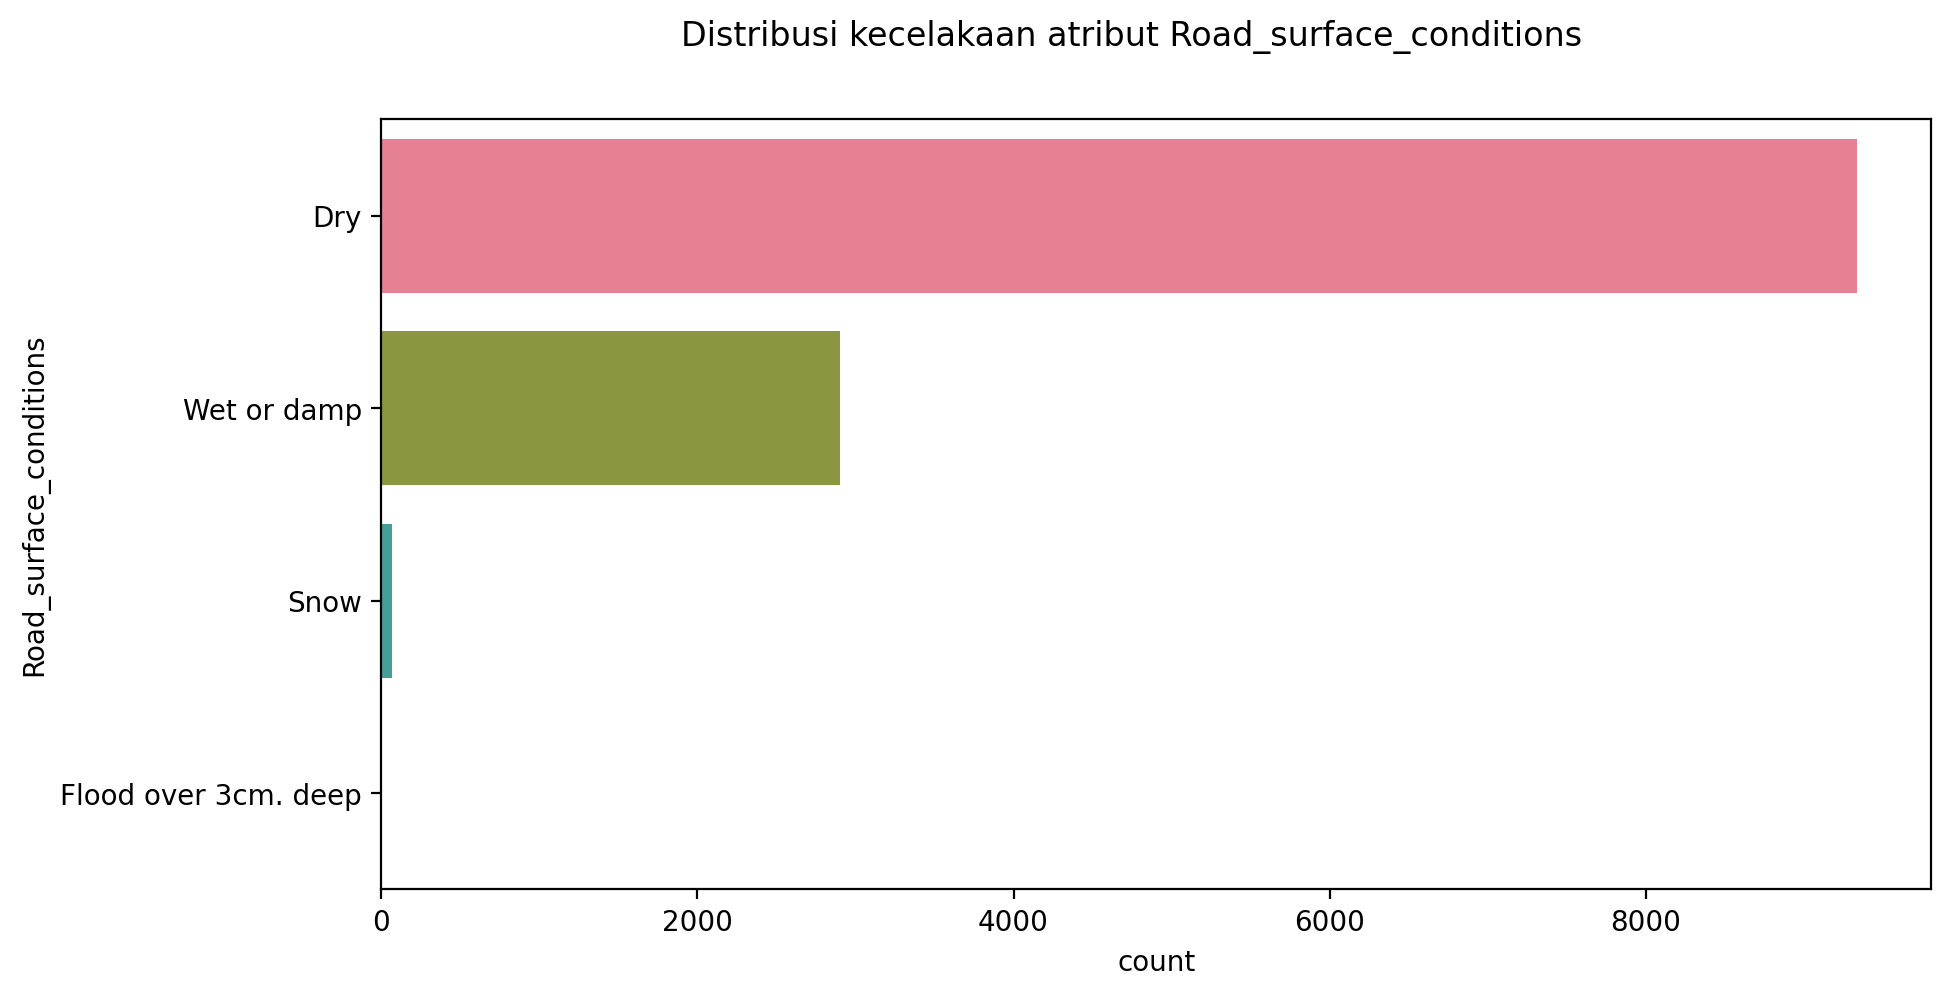

In [21]:
plt.figure(figsize=(10, 5))
plt.suptitle("Distribusi kecelakaan atribut Road_surface_conditions")
sns.countplot(
    y=rta_df["Road_surface_conditions"],
    palette='husl',
    order=rta_df['Road_surface_conditions'].value_counts().index
)
plt.savefig('distribusi_road_surface_cond.png', bbox_inches='tight')

Berdasarkan keempat visualisasi di atas, yang menarik adalah kecelakaan terbanyak ada saat kondisi jalan kering. Hal ini menarik untuk diteliti lebih jauh apa penyebab data yang kurang intuitif tersebut (mungkin saja ada pengaruh atribut lainnya sehingga terjadi kecelakaan). Namun, sesuai fokus RQ 1, akan dicek korelasinya dengan atribut lain, yaitu penyebab kecelakaan menggunakan chi-squared test.

In [22]:
# Membuat contingency table
contigency_table1 = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Road_allignment'])
contigency_table2 = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Types_of_Junction'])
contigency_table3 = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Road_surface_type'])
contigency_table4 = pd.crosstab(rta_df['Cause_of_accident'], rta_df['Road_surface_conditions'])

# Melakukan uji chi-squared
c1, p1, dof1, expected1 = chi2_contingency(contigency_table1)
c2, p2, dof2, expected2 = chi2_contingency(contigency_table2)
c3, p3, dof3, expected3 = chi2_contingency(contigency_table3)
c4, p4, dof4, expected4 = chi2_contingency(contigency_table4)

# Mencetak hasilnya
print(f"p-value Road_allignment-Cause_of_accident = {p1}")
print(f"p-value Types_of_Junction-Cause_of_accident = {p2}")
print(f"p-value Road_surface_type-Cause_of_accident = {p3}")
print(f"p-value Road_surface_conditions-Cause_of_accident = {p4}")

p-value Road_allignment-Cause_of_accident = 0.5182422648623018
p-value Types_of_Junction-Cause_of_accident = 0.67168124567254
p-value Road_surface_type-Cause_of_accident = 0.014105188369618604
p-value Road_surface_conditions-Cause_of_accident = 0.6876284305719769


Berdasarkan uji di atas, ditemukan bahwa ada empirical evidence terkait adanya korelasi antara jenis permukaan jalan dengan penyebab langsung kecelakaan. Namun, seberapa kuatkah hubungannya? Akan kita uji menggunakan Cramer's V test.

In [23]:
n = contigency_table3.sum().sum()
dof = min(contigency_table3.shape)-1
v = np.sqrt(c3/(n*dof))
print(f"Cramer's value: {v} untuk Degree of Freedom: {dof}")

Cramer's value: 0.046613924708398737 untuk Degree of Freedom: 4


Meskipun secara empiris memang ada korelasi, tetapi relatif kecil hubungannya berdasarkan uji Cramer's V.

#### **Wrap Up**

Berdasarkan eksplorasi dari data, dapat disimpulkan secara empiris bahwa ada dua atribut yang memiliki korelasi dengan penyebab langsung kecelakaan, yaitu jenis permukaan jalan dan jenis kendaraan yang digunakan. Informasi ini mungkin berguna sebagai refleksi bagi masyarakat yang menggunakan kendaraan dan otoritas terkait lalu lintas.

### **RQ 2**
Dapatkah diprediksi jumlah kasualitas dari kecelakaan berdasarkan lingkungan kejadiannya?

Dari pertanyaan diatas, bagian ini hanya akan fokus pada beberapa kolom (kolom terkait lingkugnan kejadian kecelakaan), yaitu. 
1. Area_accident_occured
2. Number_of_casualties
3. Lanes_or_Medians
4. Road_allignment
5. Types_of_Junction
6. Road_surface_type
7. Road_surface_conditions
8. Light_conditions
9. Weather_conditions

In [24]:
area_and_casualities = rta_df[['Area_accident_occured','Number_of_casualties','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions']]

#### **Mini RQ 1: Bagaimana distribusi dari variabel yang terlibat? Proses cleaning apa dapat dilakukan?**

Akan divisualisasikan distribusinya (selain yang sudah dilakukan sebelumnya pada EDA terkait RQ 1), kemudian akan dilakukan proses cleaning yang diperlukan untuk nantinya lanjut ke proses pemodelan.

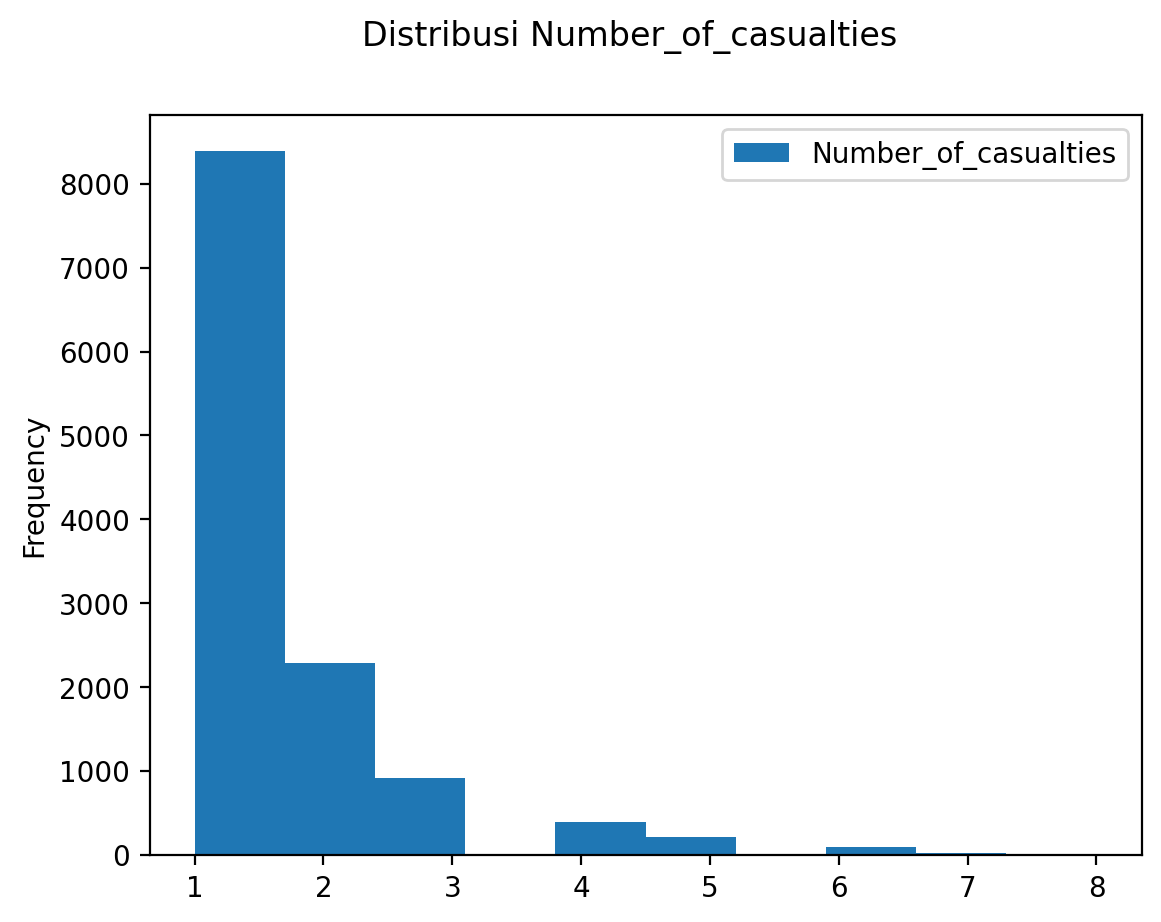

In [25]:
# Melihat distribusi Number_of_casualties
area_and_casualities.plot.hist()
plt.suptitle('Distribusi Number_of_casualties')
plt.savefig('distribusi_number_casualties.png', bbox_inches='tight')

Jumlah korban kebanyakan 1 dengan total 8000 kasus kecelakaan. Kemudian di ikuti oleh jumlah korban 2 dengan total 2000, 3 dengan 1000, dan sisanya cukup jarang terjadi. Dengan kata lain, datanya positively skewed dan cenderung light tailed (akan dikuantifikasi dengan nilai skewness dan kurtosis).

#### Possible cases of observation:
1. Kendaraan yang sering mengalami kecelakaan kebanyakan maksimal menampung hingga 3 penumpang saja.
2. Kebanyakan pengendara lebih sering mengendarai sendiri dibandingkan bersama orang.
3. Kendaraan beroda dua lebih cenderung untuk mengalami kecelakaan.
4. Kondisi ekonomi dari lingkungan tidak mendukng untuk membeli kendaraan yang beroda empat atau lebih sehingga lebih banyak penumpang dengan kendaraan roda dua.
5. Data input salah.

In [26]:
# Mengukur skewness dan kurtosis dari Number_of_casualties
print(f"Skewness dari Number_of_casualties: {skew(area_and_casualities['Number_of_casualties'])}")
print(f"Kurtosis dari Number_of_casualties: {kurtosis(area_and_casualities['Number_of_casualties'])}")

Skewness dari Number_of_casualties: 2.3444829926704918
Kurtosis dari Number_of_casualties: 6.215686525190037


Sesuai dengan visualisasi, datanya memang sangat positively skewed dengan sifat light-tailed.

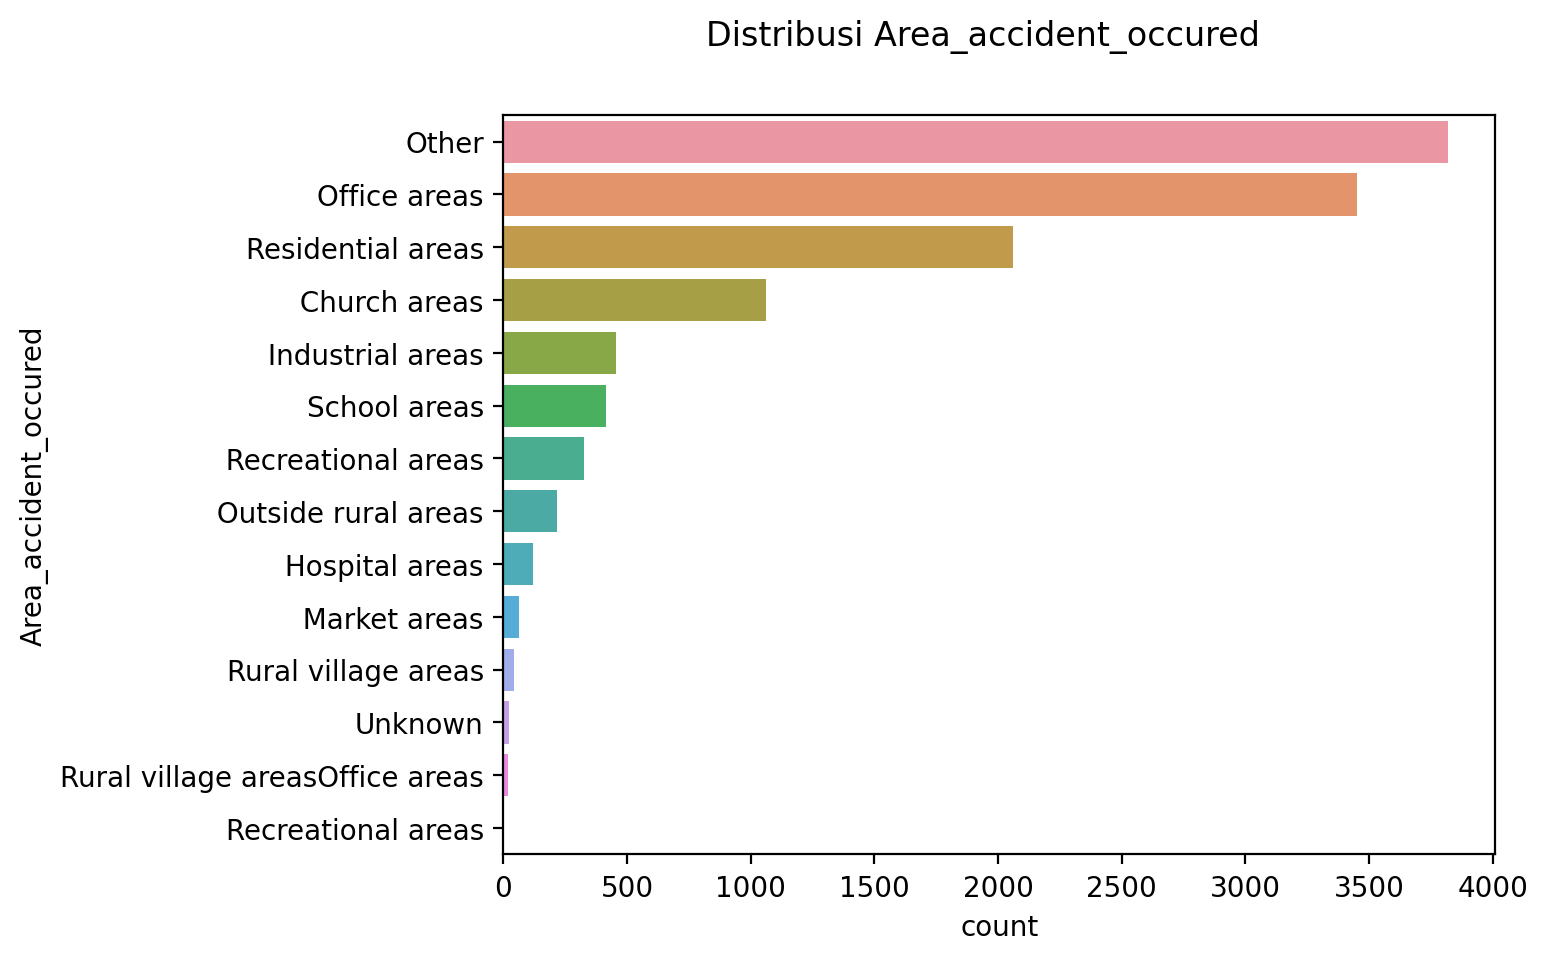

In [27]:
sns.countplot(y = 'Area_accident_occured',
              data = area_and_casualities,
              order = area_and_casualities['Area_accident_occured'].value_counts().index)
plt.suptitle('Distribusi Area_accident_occured')
plt.savefig('distribusi_area_accident_occured.png', bbox_inches='tight')

Kebanyakan kecelakaan terjadi di Other, kemudian disusul oleh Office, Residential, dan Church Areas. Namun, ada ketidakjelasan dari area sebagai berikut:
- Beberapa tempat tampaknya masih sedikit ambigu terkait kejelasan lokasi areanya. Contohnya, Outside rural areas. Apakah artinya kalau outside rural areas diluar dari area rural termasuk? ( Office, Residential, dan lainnya )

- Recreational areas dihitung dua kali, sepertinya terdapat kesalahan input text dari data yang diberikan. 

- **Unknown** dan **Other** apakah bisa dianggap sama? 

#### Feature Cleaning : Area_accident_occured

Dari hasil eksplorasi, didapati beberapa ambiguitas dan missing value sehingga memerlukan penanganan sebagai berikut.

1. Unknown dan Other diasumsikan sebagai satu area yang sama.
2. Recreational areas duplicate akan digabung menjadi 1 (yaitu menjadi tidak memiliki trailing whitespace).
3. Rural villageareasOffice Areas akan dijadikan Other karena adanya ketidakjelasan makna.
4. Handle missing value.

In [28]:
# Melihat jumlah missing value
area_and_casualities['Area_accident_occured'].isnull().sum()

239

Karena datanya relatif sedikit, maka imputasi akan dilakukan. Teknik imputasi yang digunakan adalah menggunakan mode dari Area kejadian, sehingga null akan digantikan dengan **Other**.

In [29]:
area_and_casualities.loc[:,'Area_accident_occured'] = area_and_casualities['Area_accident_occured'].fillna('Other')
area_and_casualities['Area_accident_occured'].isnull().sum()

/tmp/ipykernel_20/1792148447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_and_casualities.loc[:,'Area_accident_occured'] = area_and_casualities['Area_accident_occured'].fillna('Other')


0

In [30]:
# removes trailing whitespaces to handle duplicate Recreational Areas
area_and_casualities['Area_accident_occured'] = area_and_casualities['Area_accident_occured'].map(lambda x : x.strip())
# replace Unknown with Other
area_and_casualities.loc[area_and_casualities['Area_accident_occured'] == 'Unknown','Area_accident_occured'] = 'Other'
# replace Rural village areasOffice area with Other
area_and_casualities.loc[area_and_casualities['Area_accident_occured'] == 'Rural village areasOffice areas','Area_accident_occured'] = 'Other'

/tmp/ipykernel_20/537645791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_and_casualities['Area_accident_occured'] = area_and_casualities['Area_accident_occured'].map(lambda x : x.strip())


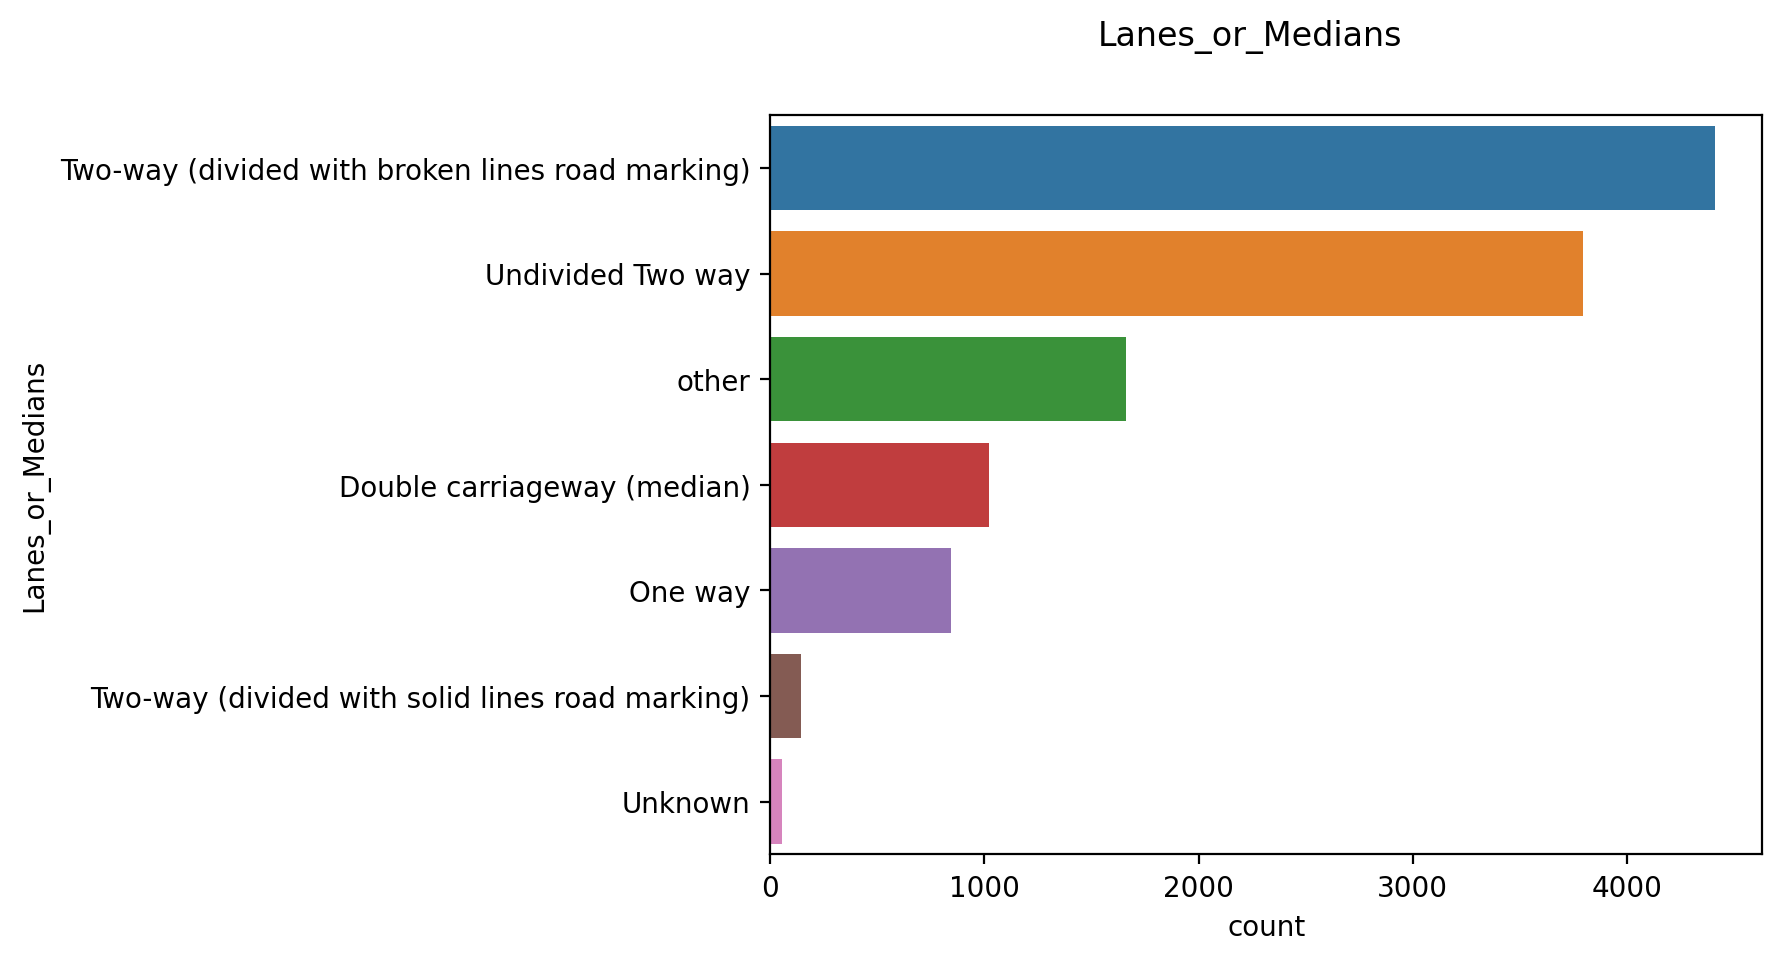

In [31]:
sns.countplot(y = 'Lanes_or_Medians',
              data = area_and_casualities,
              order = area_and_casualities['Lanes_or_Medians'].value_counts().index)
plt.suptitle('Lanes_or_Medians')
plt.savefig('distribusi_lanes_or_medians.png', bbox_inches='tight')

Kebanyakan kecelakaan terjadi di Two-way, di ikuti oleh Undivided Two way, other, dan lainnya. 

1. Kecelakaan cenderung terjadi untuk jalan yang berada dalam 1 jalan dan dipisah oleh *road lane two-way* baik itu undivided maupun divided. 
2. Kecelakaan relatif lebih sedikit untuk jalan yang bersifat one-way atau terpisah oleh median.

##### Kejelasan atribut Lanes_or_medians

- Terdapat ambiguitas terhadap unknown dan other, apakah unknown dan other sama?.
- Lanes or medians untuk atribut ini diasumsikan digabung, sedangkan road lanes dan medians dua hal yang berbeda.


### Feature Cleaning : Lanes_or_medians

Dari hasil eksplorasi diatas, terhadap beberapa ambiguitas yang perlu diperbaiki.

1. Unknown akan diganti dengan other.
2. Karena hanya terdapat 1 tipe median, maka atribut tetap digabung.
3. handle missing value.

In [32]:
# replace unknown with other
area_and_casualities.loc[area_and_casualities['Lanes_or_Medians'] == 'Unknown','Lanes_or_Medians'] = 'other'

In [33]:
area_and_casualities['Lanes_or_Medians'].isnull().sum()

385

Karena missing value-nya relatif sedikit, maka missing value akan di-impute dengan menggunakan mode dari Lanes_or_Medians, yaitu Two-way divided with broken lines.

In [34]:
area_and_casualities['Lanes_or_Medians'] = area_and_casualities['Lanes_or_Medians'].fillna('Two-way (divided with broken lines road marking)')
area_and_casualities['Area_accident_occured'].isnull().sum()

/tmp/ipykernel_20/3920799009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_and_casualities['Lanes_or_Medians'] = area_and_casualities['Lanes_or_Medians'].fillna('Two-way (divided with broken lines road marking)')


0

In [35]:
area_and_casualities['Road_allignment'].isnull().sum()

142

#### Feature Cleaning : Road_allignment

Dari hasil visualisasi EDA RQ 1 dan perhitungan jumlah null, diperlukan cleaning atribut road_allignment, yaitu terkait data kosong.

Karena missing value-nya relatif sedikit, maka missing value akan di-impute dengan menggunakan mode dari Road_allignment, yaitu flat terrain.

In [36]:
area_and_casualities['Road_allignment'] = area_and_casualities['Road_allignment'].fillna('Tangent road with flat terrain')
area_and_casualities['Road_allignment'].isnull().sum()

/tmp/ipykernel_20/4114800790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_and_casualities['Road_allignment'] = area_and_casualities['Road_allignment'].fillna('Tangent road with flat terrain')


0

In [37]:
print(area_and_casualities['Types_of_Junction'].isnull().sum())

887


#### Feature Cleaning : Types_of_Junction

Dari hasil visualisasi pada mini RQ untuk RQ 1 dan jumlah nilai null seperti pengecekan di atas, diputuskan untuk:
1. Mengisi missing value dengan mode (sementara), untuk modeling nantinya bisa dicoba metode seperti KNN.
2. Substitusi unknown menjadi other.

In [38]:
area_and_casualities['Types_of_Junction'] = area_and_casualities['Types_of_Junction'].fillna('Y Shape')
area_and_casualities['Types_of_Junction'].isnull().sum()

/tmp/ipykernel_20/2821546665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_and_casualities['Types_of_Junction'] = area_and_casualities['Types_of_Junction'].fillna('Y Shape')


0

In [39]:
area_and_casualities.loc[area_and_casualities['Types_of_Junction'] == 'Unknown','Types_of_Junction'] = 'Other'

#### Feature Cleaning : Weather_conditions

Berdasarkan visualisasi dari Weather_conditions pada mini RQ untuk RQ 1, diputuskan untuk:
1. Menggantikan unknown menjadi other.

In [40]:
area_and_casualities.loc[area_and_casualities['Weather_conditions'] == 'Unknown','Weather_conditions'] = 'Other'

#### **Mini RQ 2: Bagaimana korelasi antara atribut terkait lingkungan kecelakaan dengan jumlah kasualitasnya?**

Agar *concrete*, akan digunakan uji statistik, yaitu One-way ANOVA karena atribut lingkungan kecelakaan bersifat kategorikal sedangkan jumlah kasualitas bersifat numerik.

#### Statistic Test : ANOVA

In [41]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
def anova_statistically_significant_attribute(data, target_feature, features):
    models = []

    for feature in selected_features:
        model = smf.ols(f'{target_feature} ~ C({feature})', data = data).fit()
        table = sm.stats.anova_lm(model)
    
        if table['PR(>F)'][0] < 0.05:
            print(f"{feature} is likely correlated with {target_feature}")
            models.append({'attribute_name' : feature, 'model':model})
            print(table,"\n")
        
    return models

def attributes_shapiro_test(models):
    for model in models:
        p_val = stats.shapiro(model['model'].resid).pvalue
        if p_val < 0.05:
            print(f"Residu dari atribut {model['attribute_name']} tidak terdistribusi normal, p-value-nya {p_val}")
        else:
            print(f"Residu dari atribut {model['attribute_name']} terdistribusi normal, p-value-nya {p_val}")
        fig = plt.figure(figsize = (10, 10))
        ax = fig.add_subplot(111)

        normality_plot, stat = stats.probplot(model['model'].resid, plot = plt, rvalue = True)
        ax.set_title("Probability plot of model residual's", fontsize = 20)

        plt.savefig(f"{model['attribute_name']}_residual_plot.png", bbox_inches='tight')

In [42]:
selected_features =  ['Area_accident_occured','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions']
models = anova_statistically_significant_attribute(area_and_casualities,'Number_of_casualties',selected_features)

Area_accident_occured is likely correlated with Number_of_casualties
                               df        sum_sq   mean_sq         F    PR(>F)
C(Area_accident_occured)     10.0     20.285733  2.028573  2.001385  0.029214
Residual                  12305.0  12472.162059  1.013585       NaN       NaN 

Types_of_Junction is likely correlated with Number_of_casualties
                           df        sum_sq   mean_sq         F        PR(>F)
C(Types_of_Junction)      6.0     50.401457  8.400243  8.310417  5.227860e-09
Residual              12309.0  12442.046335  1.010809       NaN           NaN 

Road_surface_conditions is likely correlated with Number_of_casualties
                                 df        sum_sq    mean_sq          F  \
C(Road_surface_conditions)      3.0     90.560706  30.186902  29.968112   
Residual                    12312.0  12401.887085   1.007301        NaN   

                                  PR(>F)  
C(Road_surface_conditions)  2.694533e-19  
Residual   

#### Statistic Test : Interim results
Dari hasil ANOVA, sepertinya beberapa atribut memiliki pengaruh terhadap jumlah korban. Untuk memastikan hasilnya valid, maka asumsi terkait normality akan diuji terlebih dahulu. Test yang digunakan akan menggunakan shapiro test.

/opt/conda/lib/python3.10/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Residu dari atribut Area_accident_occured tidak terdistribusi normal, p-value-nya 0.0
Residu dari atribut Types_of_Junction tidak terdistribusi normal, p-value-nya 0.0
Residu dari atribut Road_surface_conditions tidak terdistribusi normal, p-value-nya 0.0
Residu dari atribut Light_conditions tidak terdistribusi normal, p-value-nya 0.0
Residu dari atribut Weather_conditions tidak terdistribusi normal, p-value-nya 0.0


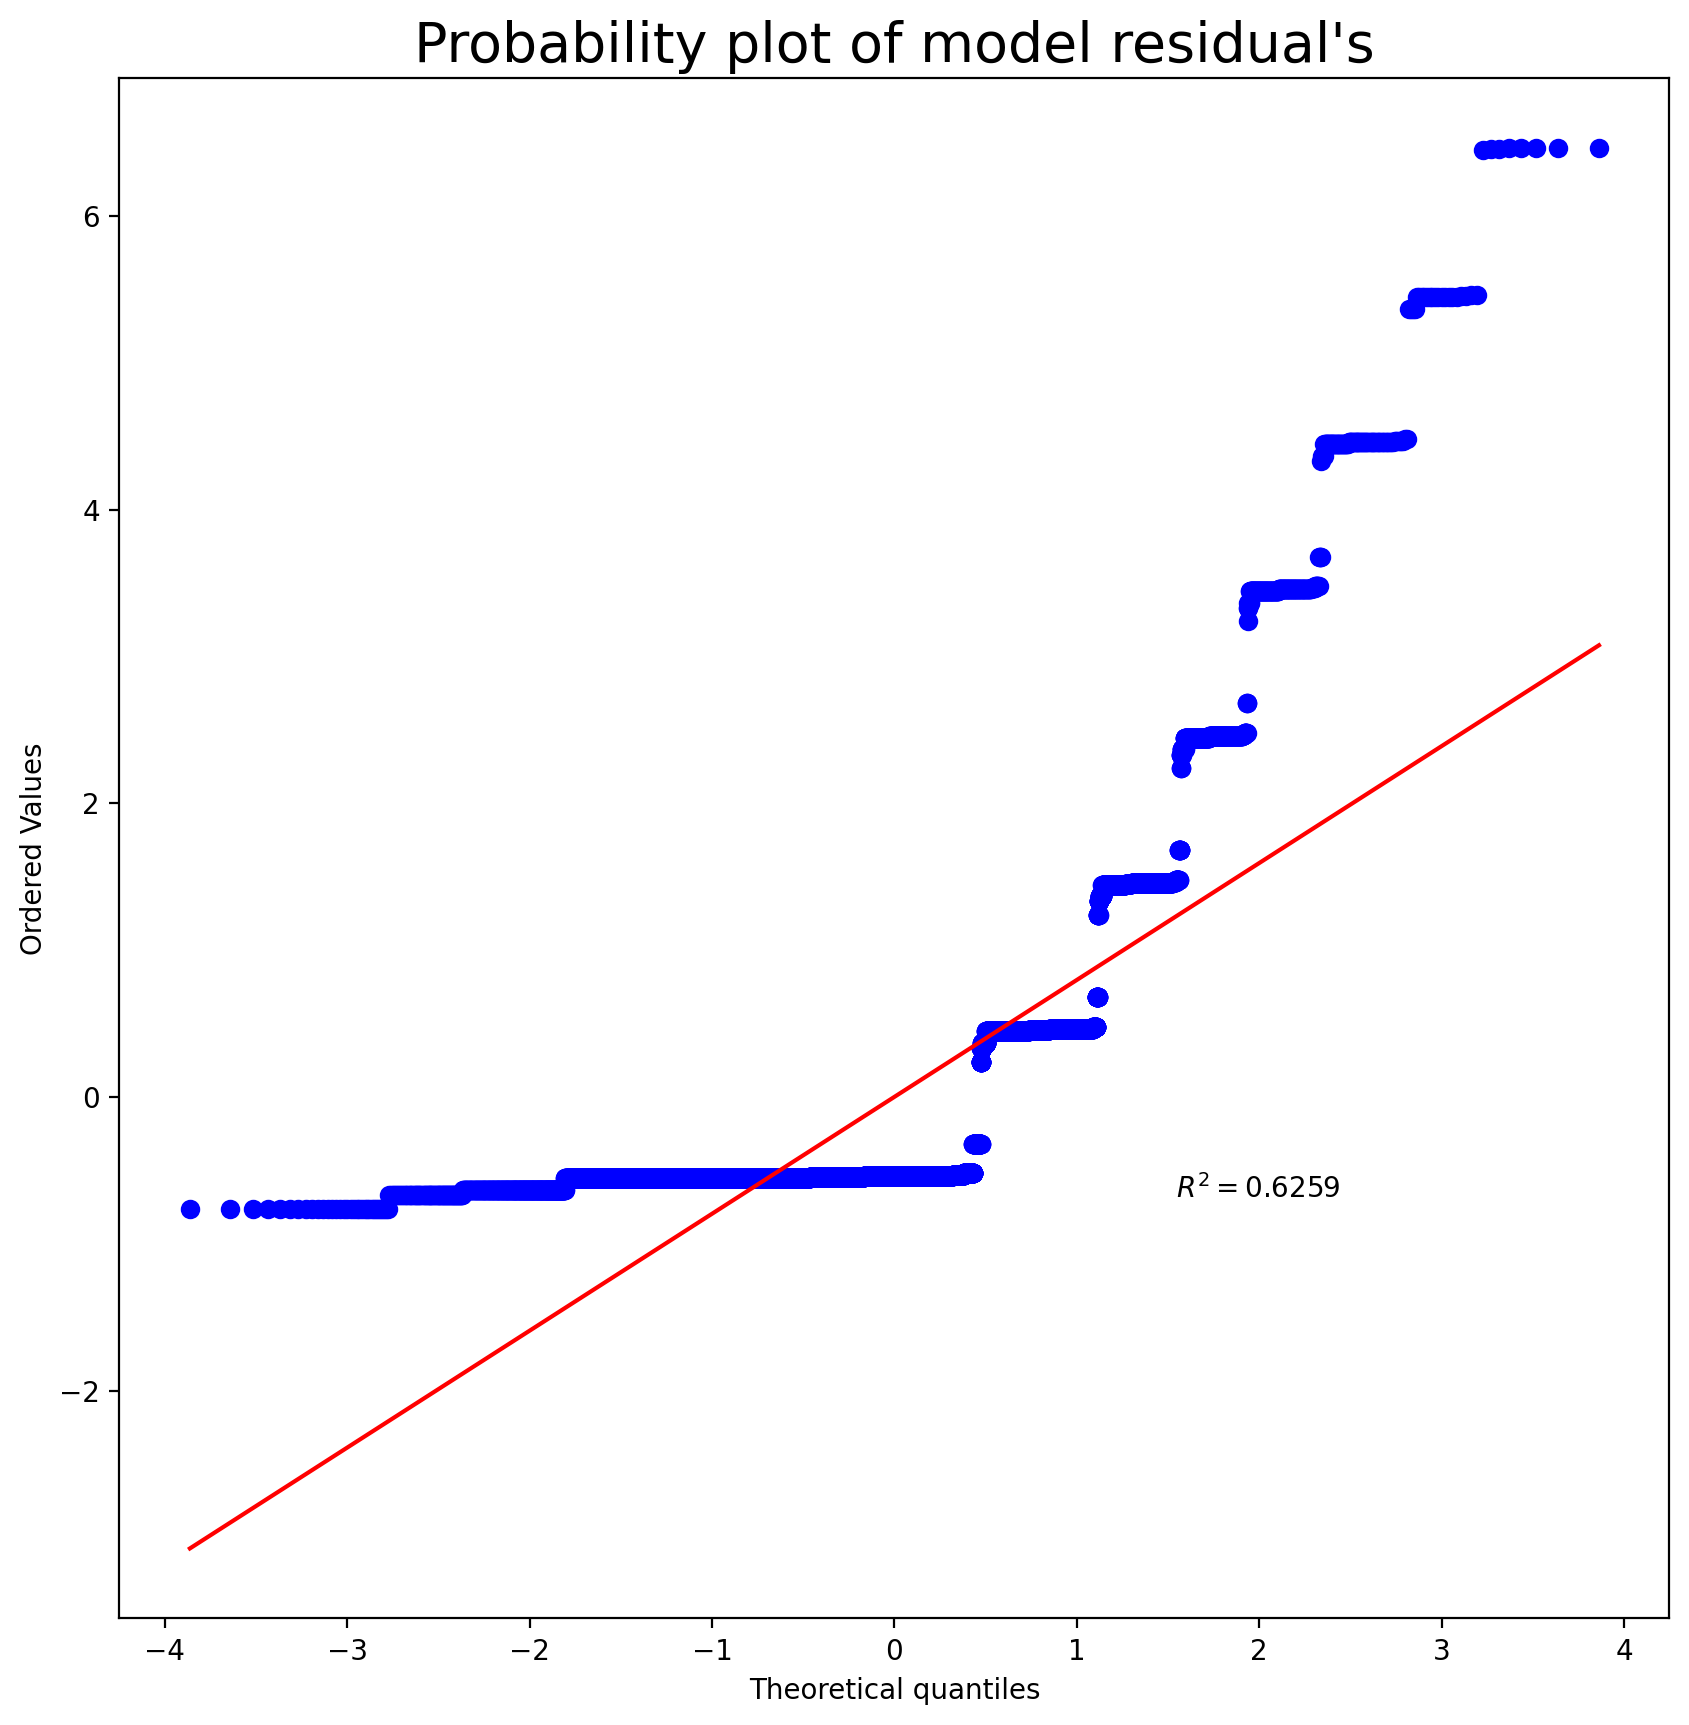

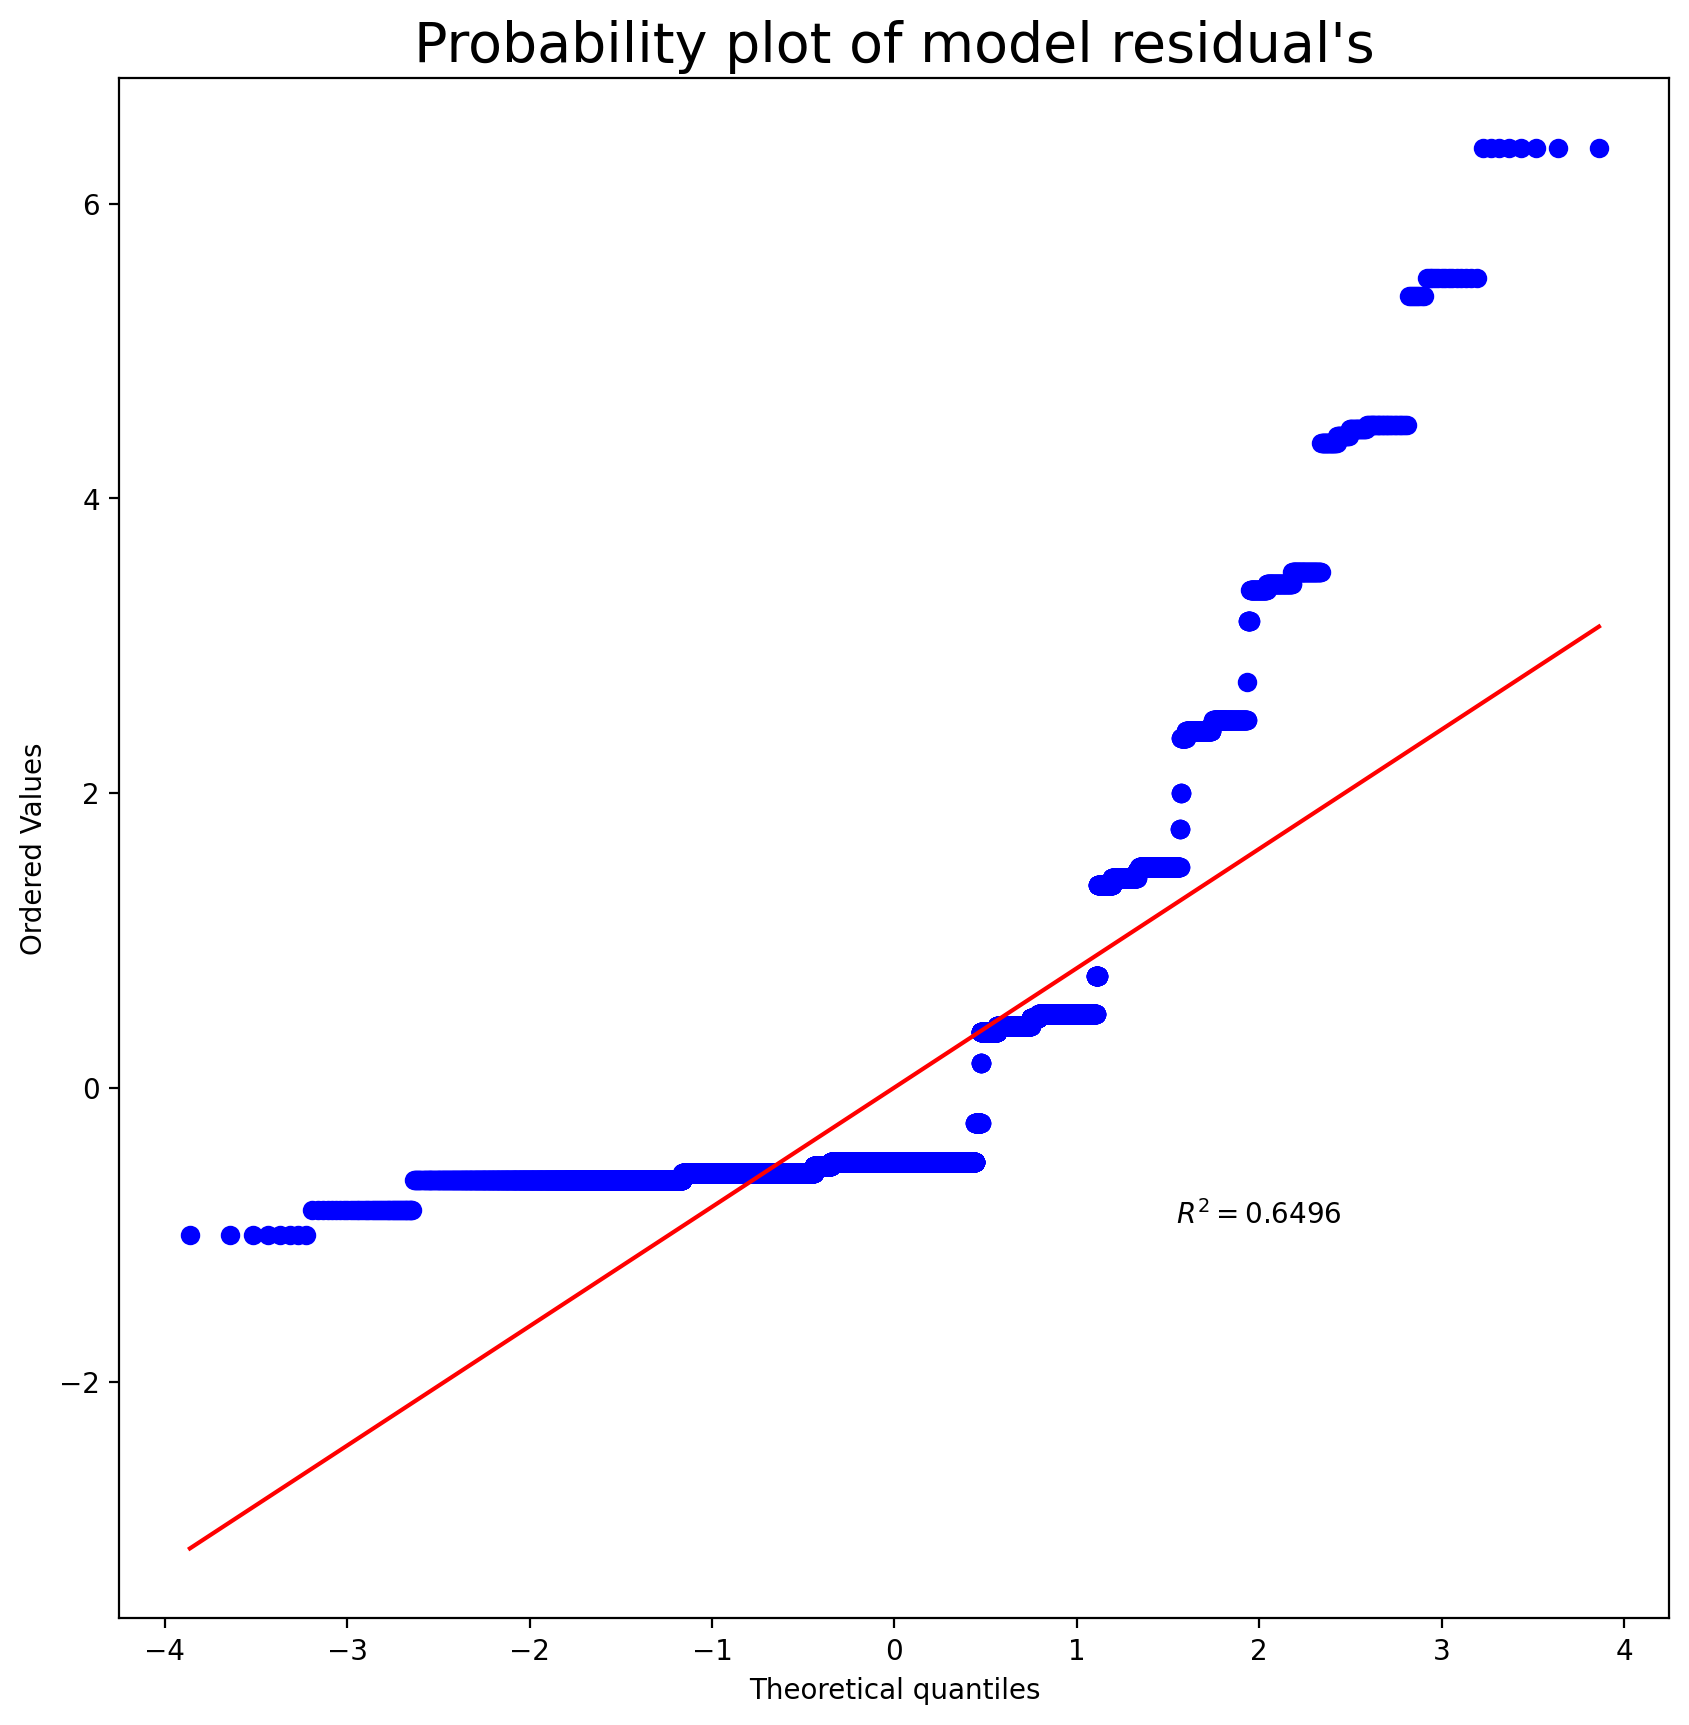

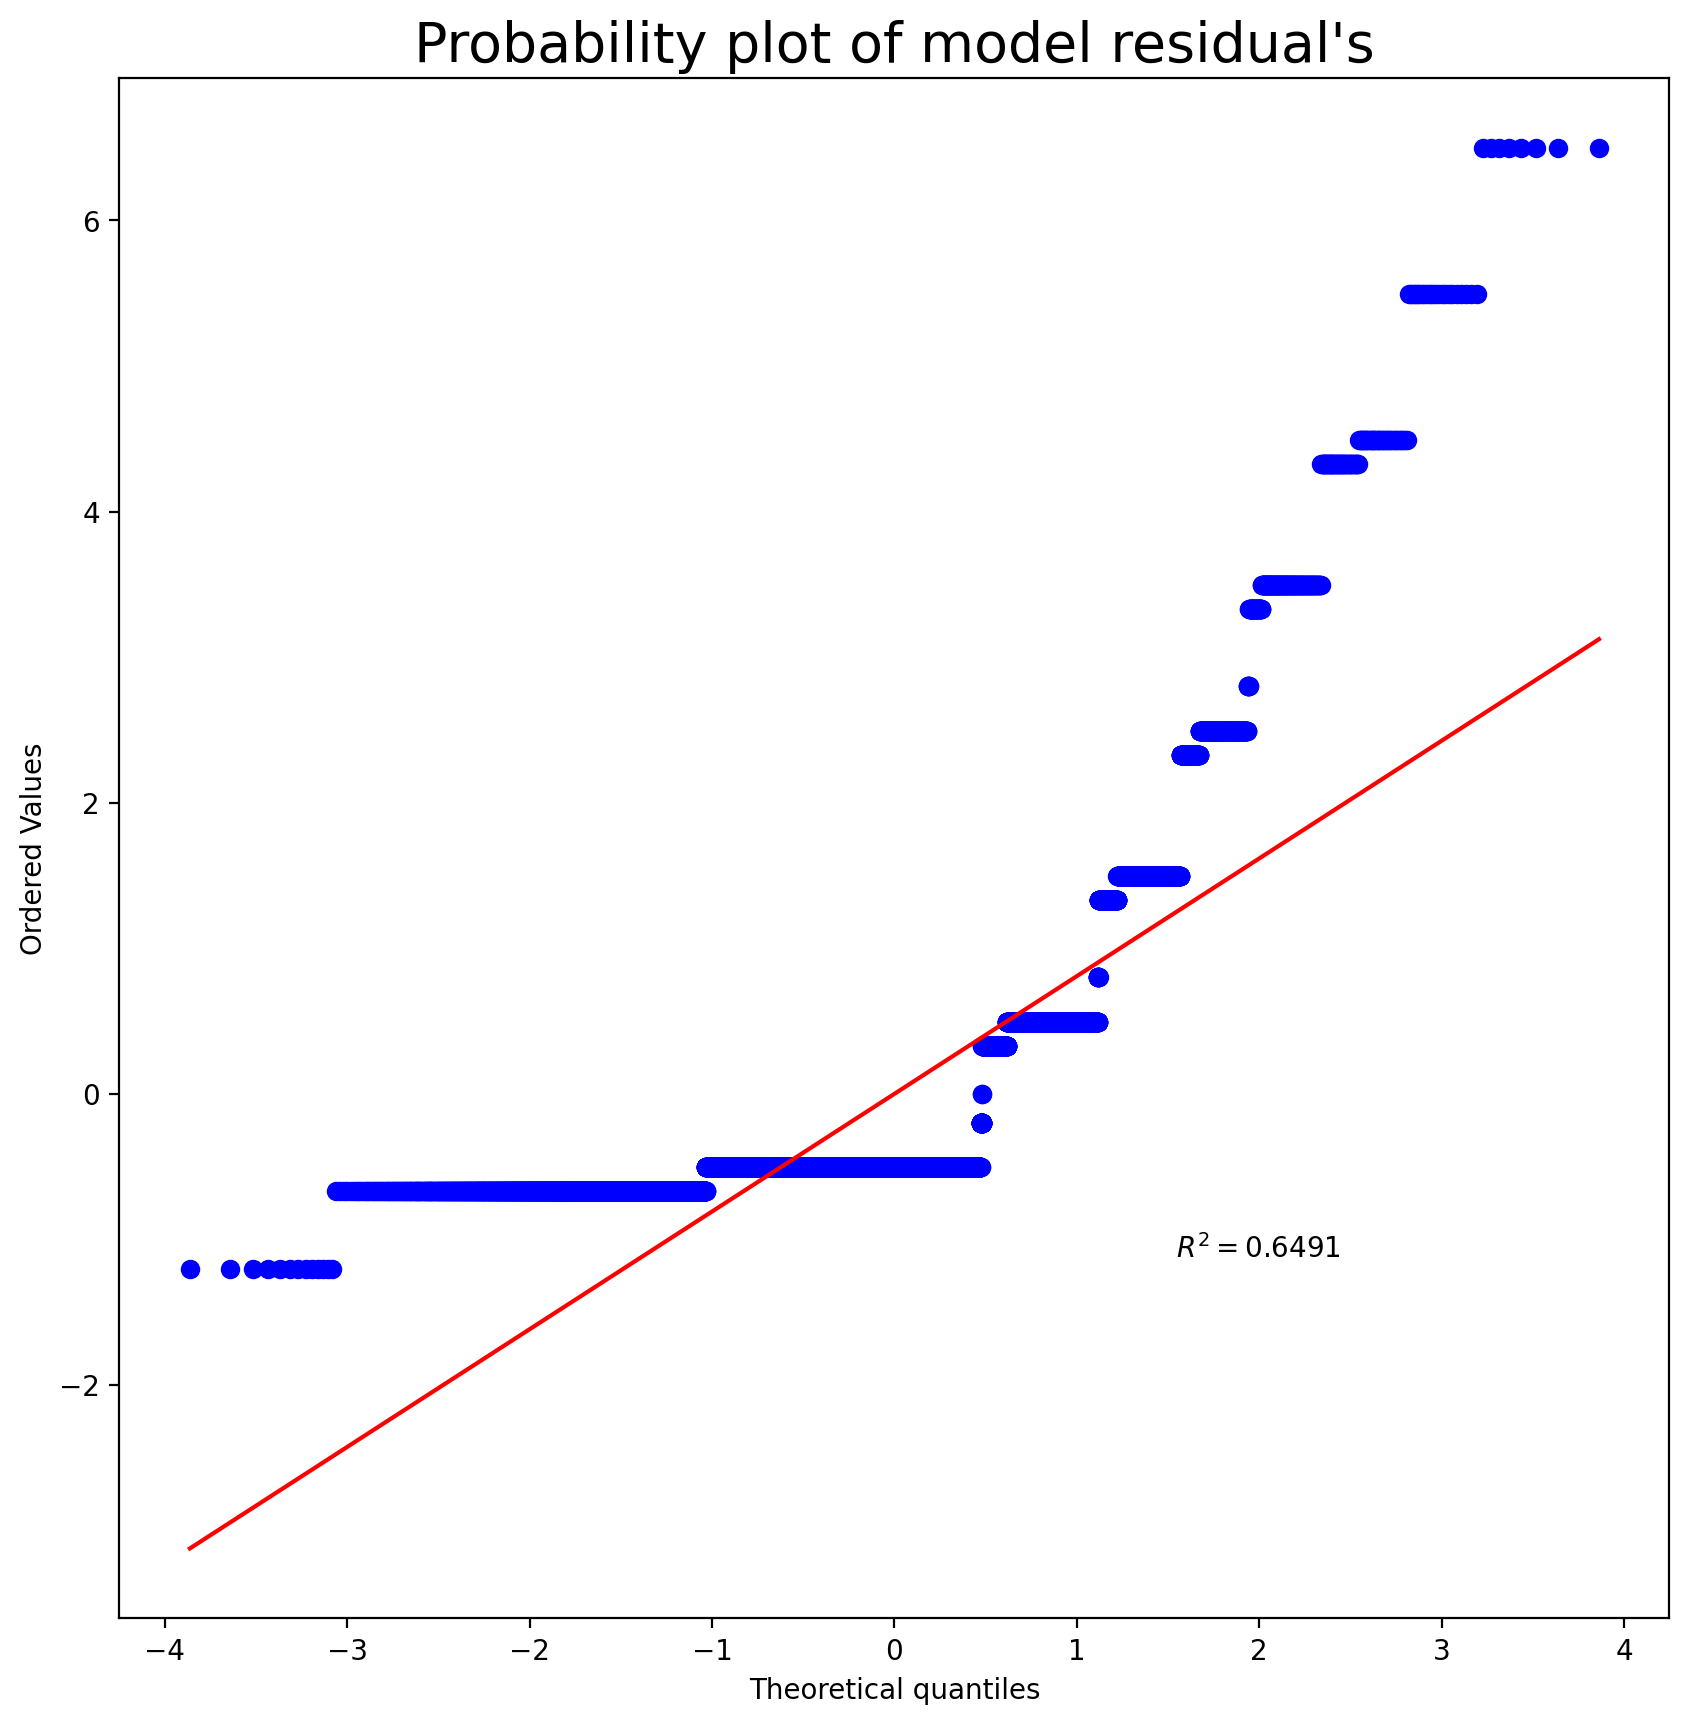

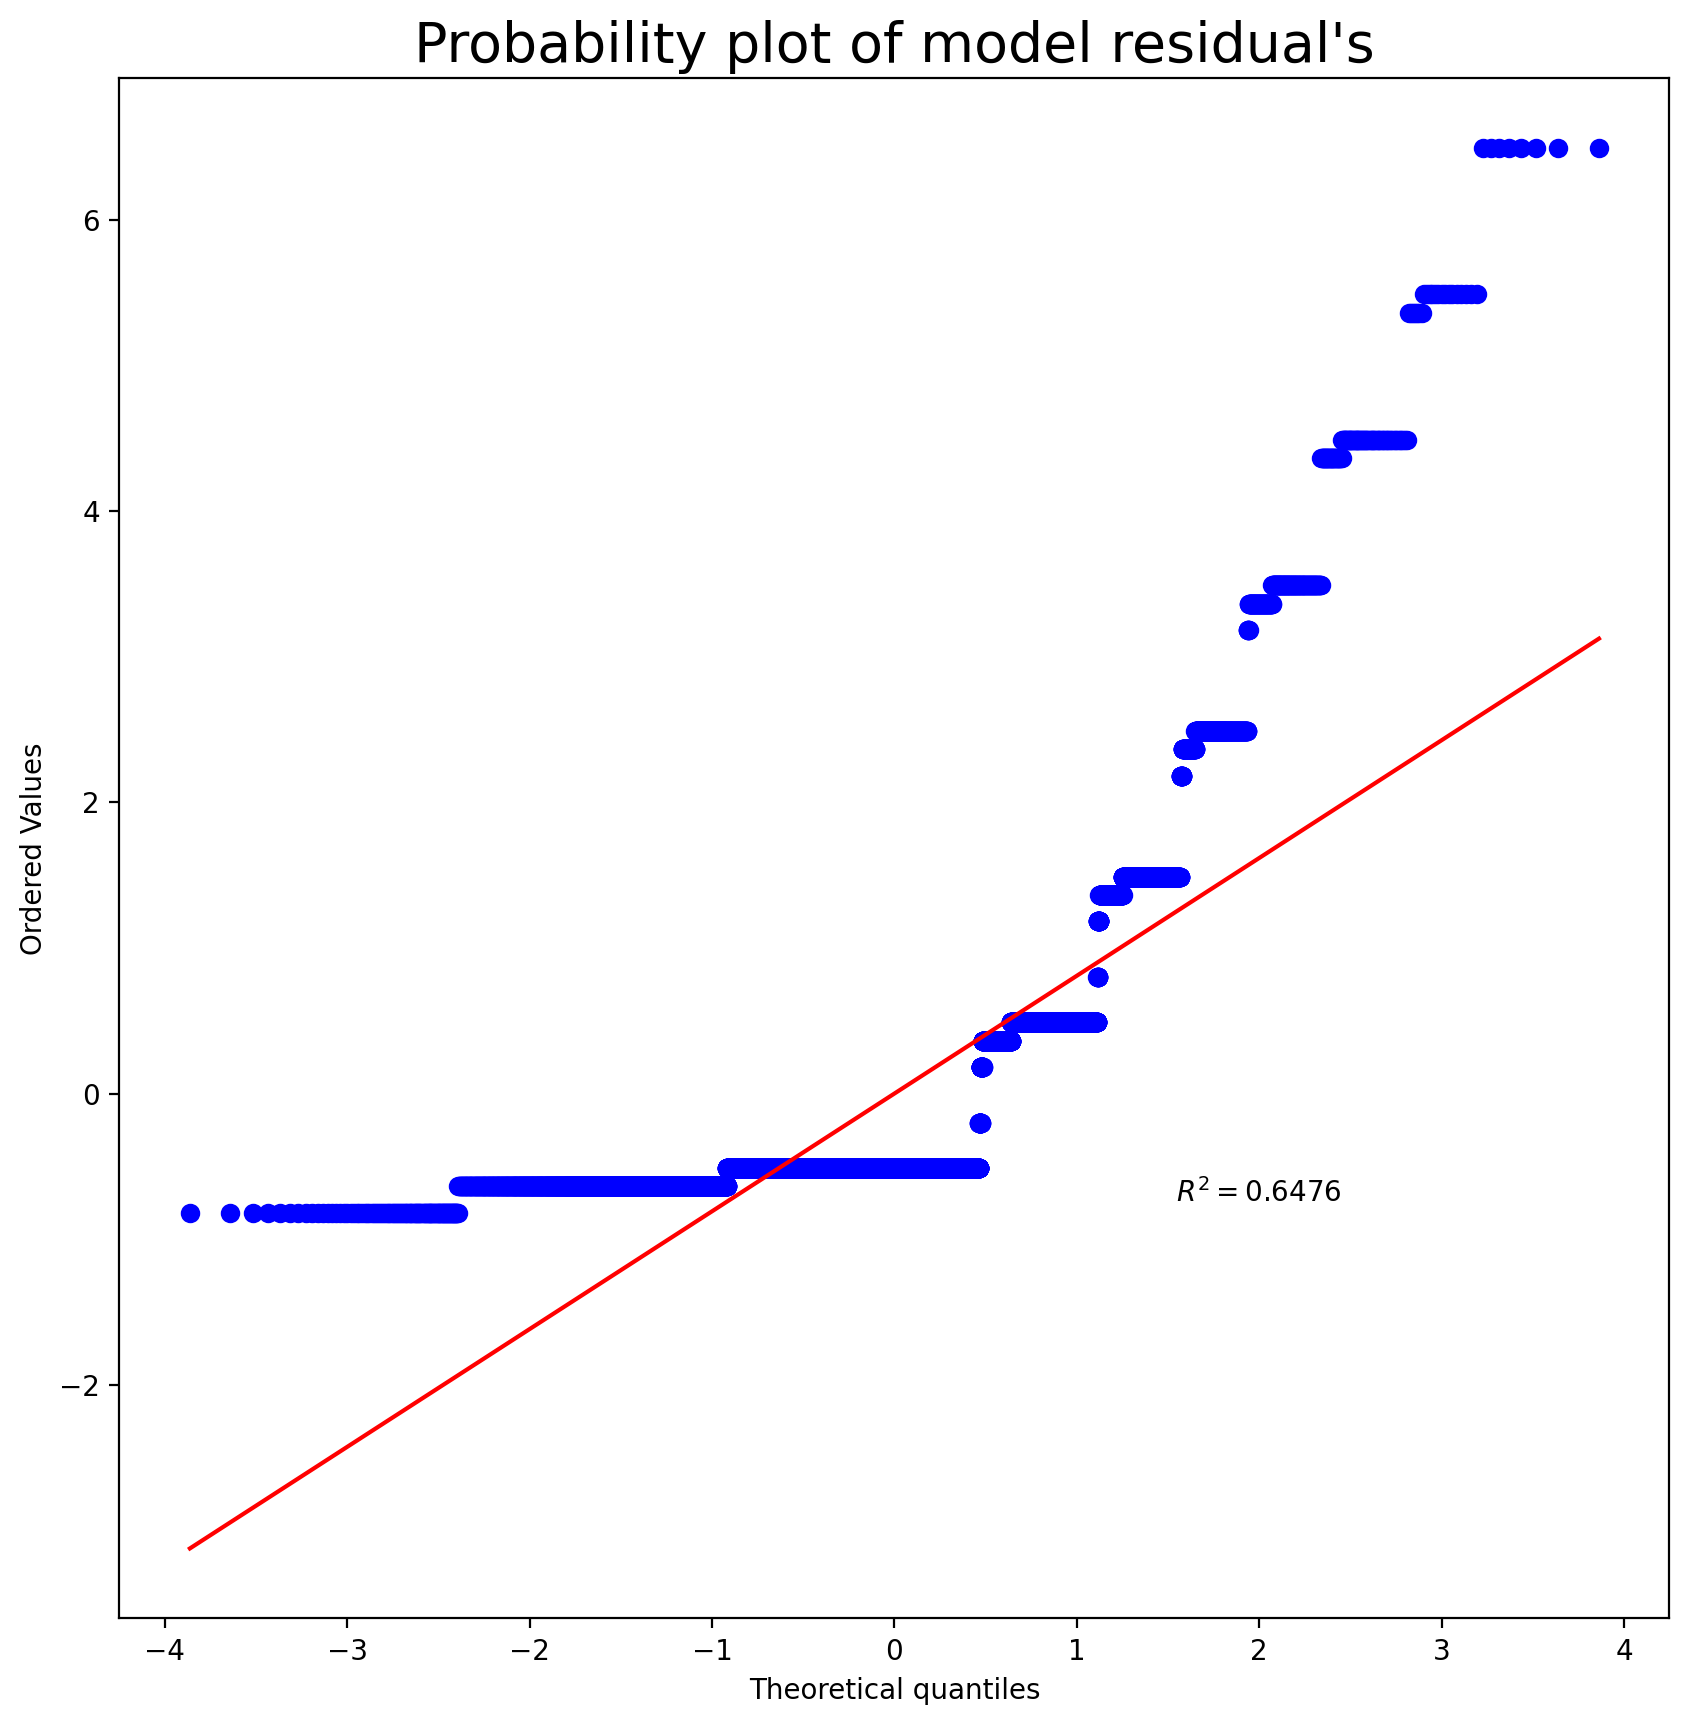

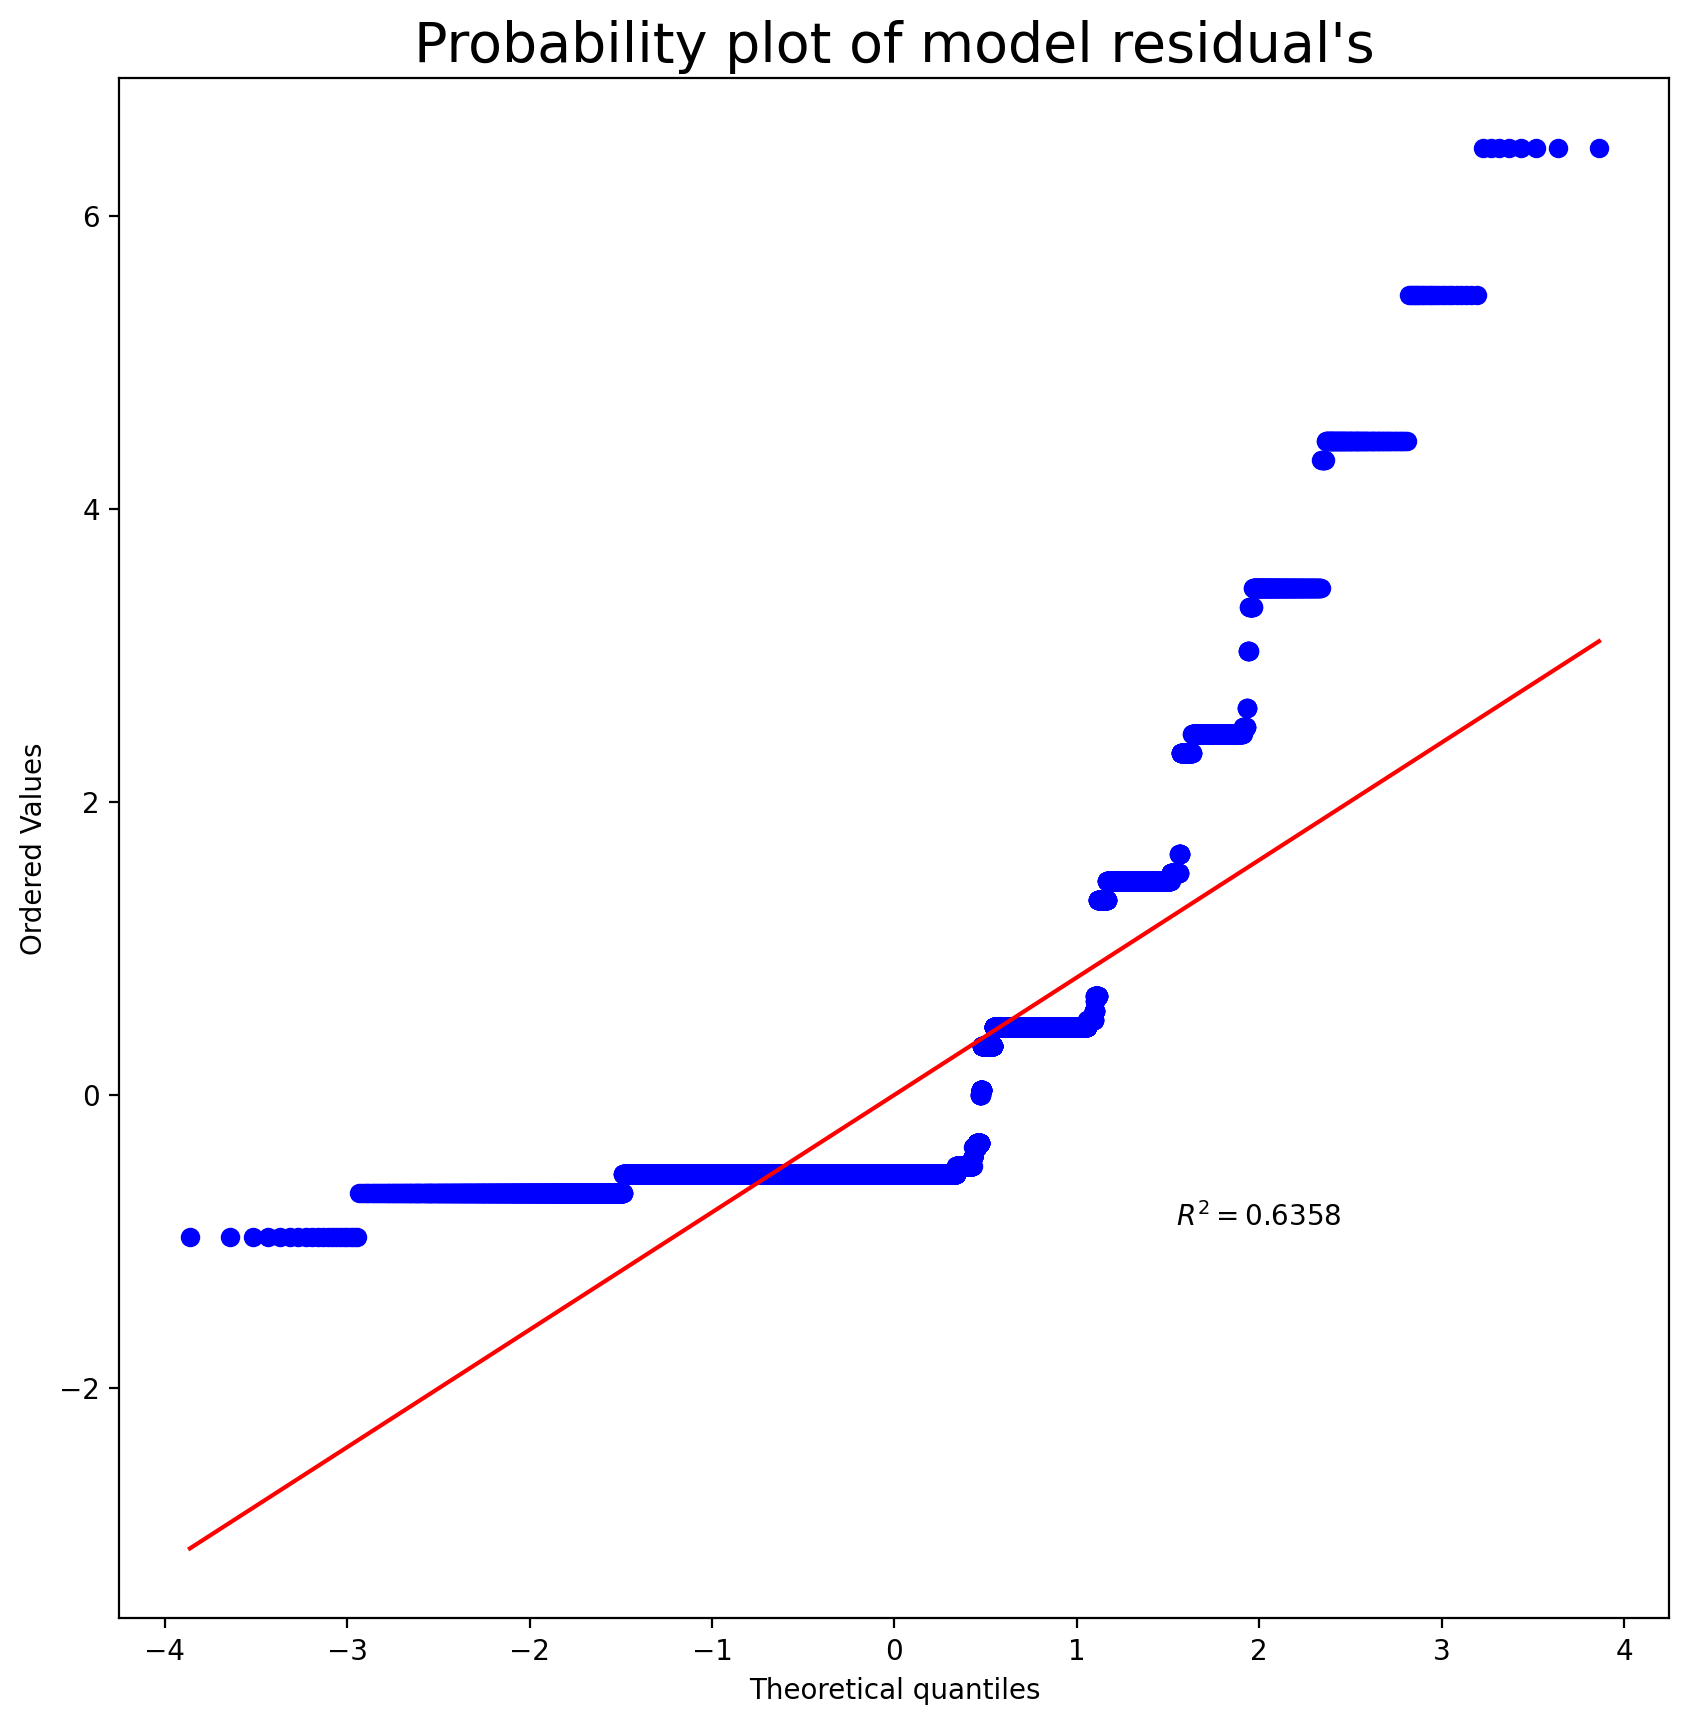

In [43]:
attributes_shapiro_test(models)

#### Statistic Test : Final result

p-value dari shapiro test < 0.05 untuk semua atribut. Hal ini mengindikasikan bahwa residual tidak terdistribusi normal sehingga asumsi ANOVA tidak terpenuhi. Oleh karenanya, tidak terdapat bukti empiris yang menunjukkan bahwa atribut-atribut yang telah dipilih mempengaruhi jumlah korban. Namun, perlu diingat juga bahwa gagalnya test ANOVA tidak berarti atribut tersebut tidak memiliki hubungan dengan jumlah korban, kedua pernyataan tersebut perlu dibuktikan baik secara statistik maupun metode lainnya.

### Modelling


Meskipun penggunaan ANOVA tidak mengindikasikan adanya hubungan antara lingkungan dengan number of casualties, tetapi kami akan tetap mencoba memprediksi jumlah korban berdasarkan lingkungannya.

Dalam memodelkan jumlah korban, akan dilakukan hal berikut.

1. Feature selection, memilih atribut yang terbaik untuk memprediksi jumlah korban.
2. Feature Engineering terhadap atribut lingkungan karena sifatnya kategorik.
3. Menggunakan beberapa model untuk memprediksi jumlah kecelakaan.

Metode yang akan kami gunakan sederhana karena kami ingin melihat secara sekilas apakah memungkinkan untuk memprediksi jumlah korban berdasarkan lingkungan. Oleh karenannya, kami hanya akan menggunakan train test split dan beberapa model konvensional.



#### Feature Engineering

In [44]:
X = area_and_casualities.drop(columns=["Number_of_casualties"])
y = area_and_casualities['Number_of_casualties']
X = pd.get_dummies(X,drop_first=True)

### Feature Selection



In [45]:
from sklearn.feature_selection import SelectKBest, f_classif

k = 10  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)

In [46]:
selected_feature_indices

array([23, 25, 26, 28, 34, 35, 38, 40, 42, 44])

In [47]:
X = X.iloc[:, selected_feature_indices]

In [48]:
X.columns

Index(['Types_of_Junction_No junction', 'Types_of_Junction_Other',
       'Types_of_Junction_T Shape', 'Types_of_Junction_Y Shape',
       'Road_surface_conditions_Snow', 'Road_surface_conditions_Wet or damp',
       'Light_conditions_Daylight', 'Weather_conditions_Normal',
       'Weather_conditions_Raining', 'Weather_conditions_Snow'],
      dtype='object')

#### Train test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#### modelling

In [51]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [53]:
prediction = random_forest.predict(X_test)

In [54]:
metrics(prediction, y_test)

MAE: 0.7442743353303787
MSE: 1.080494545233199
RMSE: 1.03946839549512
R_squared: 0.03763065179139424


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
lr_prediction = linear_regression.predict(X_test)
metrics(lr_prediction,y_test)

MAE: 0.7585549901524973
MSE: 1.11190009131598
RMSE: 1.054466733148078
R_squared: 0.009658520837879547


In [57]:
from sklearn.linear_model import SGDRegressor

sgd_regression = SGDRegressor()
sgd_regression.fit(X_train,y_train)
sgd_prediction = sgd_regression.predict(X_test)
metrics(sgd_prediction,y_test)

MAE: 0.7549191894184615
MSE: 1.1184221934118903
RMSE: 1.0575548181592718
R_squared: 0.003849448343546502


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regression = GradientBoostingRegressor()
gb_regression.fit(X_train,y_train)
gb_prediction = gb_regression.predict(X_test)
metrics(gb_prediction,y_test)


MAE: 0.7479564441205856
MSE: 1.086236958078363
RMSE: 1.0422269225453558
R_squared: 0.032516028926035445


### Hasil

Dari percobaan diatas, dapat diperhatikan dengan menggunakan kolom-kolom yang ada, baik itu dari intersection, area of accidents, road surface, dan lainnya tidak dapat digunakan untuk memprediksi jumlah kecelakaan. Jumlah kecelakaan sangat bergantung terhadap banyaknya pengendara di waktu tersebut, sehingga lokasi bukan parameter yang untuk memprediksi jumlah kecelakaan.

Namun, lokasi tentunya dapat mempengaruhi rate terjadinya kecelakaan, seperti dari hasil penelitian yang telah dilakukan oleh Guo Fang Wu et al.

### **RQ 3**

Sejauh mana tingkat keparahan kecelakaan lalu lintas dapat diprediksi secara otomatis?

In [59]:
analysis_df  = rta_df.drop(rta_df[rta_df.eq('na').any(axis=1)].index).drop(rta_df[rta_df.eq('nan').any(axis=1)].index).dropna().reset_index(drop=True)
analysis_df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
1,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
2,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
3,8:20:00,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,5-10yrs,...,Going straight,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
4,15:10:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,...,Moving Backward,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,18:45:00,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Special vehicle,Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
1843,19:12:00,Tuesday,31-50,Male,Elementary school,Owner,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
1844,12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
1845,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury


In [60]:
label_map = {'Slight Injury': 1, 'Serious Injury': 2, 'Fatal injury': 3}
analysis_df['Accident_severity label'] = analysis_df['Accident_severity'].map(label_map)
analysis_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Accident_severity label
0,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,1
1,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,2
2,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury,2
3,8:20:00,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,5-10yrs,...,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,2
4,15:10:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,...,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury,2


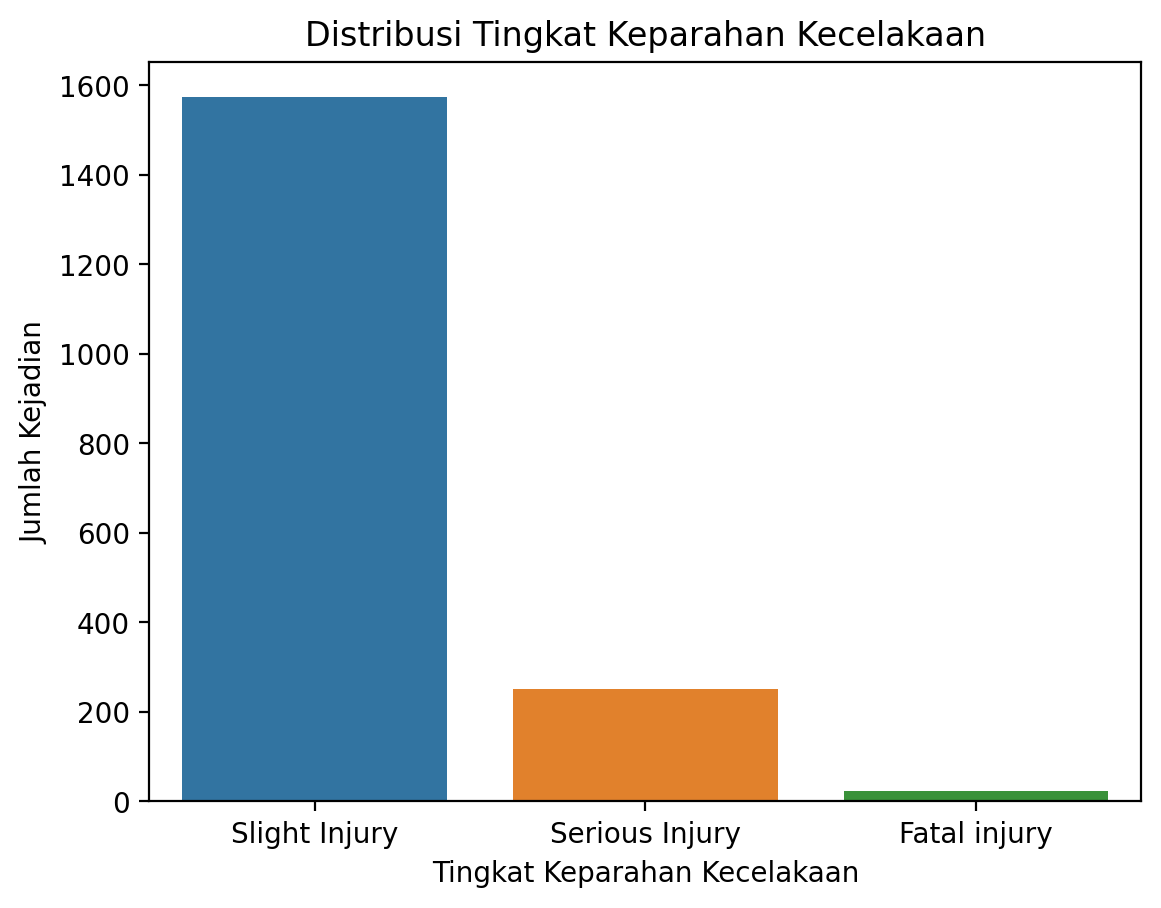

In [61]:
sns.countplot(x='Accident_severity', data=analysis_df)
plt.xlabel('Tingkat Keparahan Kecelakaan')
plt.ylabel('Jumlah Kejadian')
plt.title('Distribusi Tingkat Keparahan Kecelakaan')
plt.savefig('sebaran_kelas_keparahan_kecelakaan.png', bbox_inches='tight')

Pada kasus kecelakaan yang terjadi terdapat beberapa aspek *domain knowledge* yang dapat dicoba untuk diperiksa apakah secara empiris ada korelasinya dengan tingkat keparahan kecelakaan.

Dari penelitian yang telah dilakukan sebelumnya oleh Vukosi Marivate et al, dikatakan bahwa pengalaman berkendara yang juga berkaitan dengan lisensi pengendara, memiliki korelasi terhadap tingkat keparahan kecelakaan yang ada sehingga hal itu akan diperiksa pada mini RQ 1.

#### **Mini RQ 1: Apakah ada korelasi antara pengalaman pengendara dengan tingkat keparahan kecelakaan? Jika ada, seberapa kuat hubungannya?**

In [62]:
analysis_df["Driving_experience"].unique()

array(['Above 10yr', '1-2yr', 'Below 1yr', '2-5yr', '5-10yr',
       'No Licence', 'unknown'], dtype=object)

In [63]:
exp_label = {'unknown'   : 2, 
             'No Licence': 1, 
             'Below 1yr' : 2, 
             '1-2yr'     : 3, 
             '2-5yr'     : 4, 
             '5-10yr'    : 5,
             'Above 10yr': 6 }

analysis_df['Driving_experience label'] = analysis_df['Driving_experience'].map(exp_label)
analysis_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Accident_severity label,Driving_experience label
0,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,1,6
1,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,2,3
2,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury,2,6
3,8:20:00,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,5-10yrs,...,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,2,2
4,15:10:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury,2,4


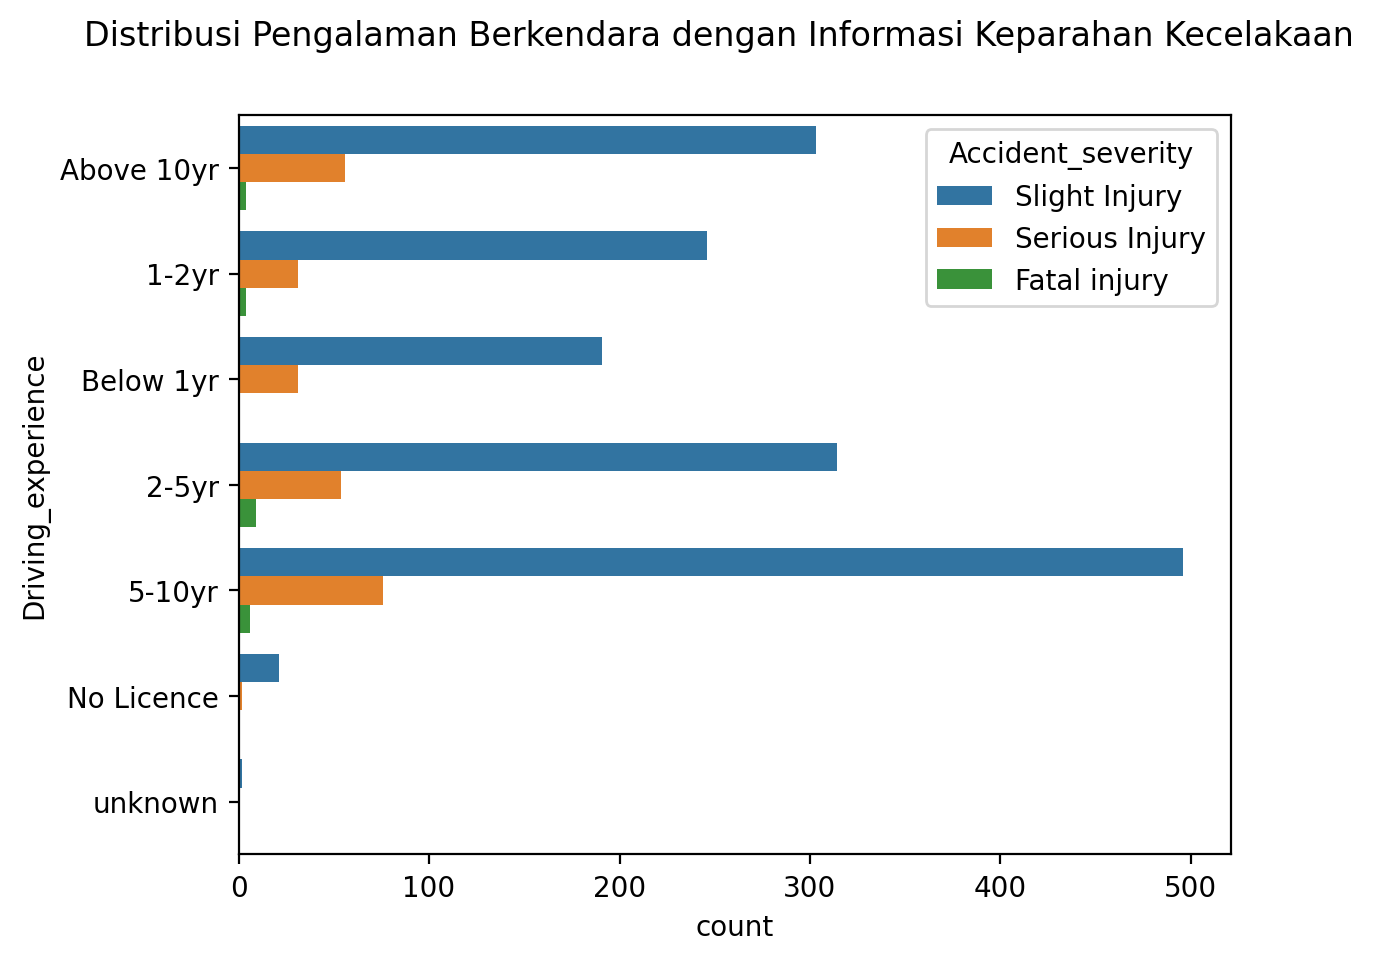

In [64]:
sns.countplot(data=analysis_df, y = "Driving_experience",  hue = "Accident_severity")
plt.suptitle('Distribusi Pengalaman Berkendara dengan Informasi Keparahan Kecelakaan')
plt.savefig('dist_exp_driving_with_severity.png', bbox_inches='tight')

In [65]:
contigency_table_driver_exp = pd.crosstab(analysis_df['Accident_severity label'], analysis_df['Driving_experience label'])
c1, p1, dof1, expected1 = chi2_contingency(contigency_table_driver_exp)

print(contigency_table_driver_exp)
print(f"p-value Driving_experience label - Accident_severity = {p1}")

Driving_experience label   1    2    3    4    5    6
Accident_severity label                              
1                         21  193  246  314  496  303
2                          2   32   31   54   76   56
3                          0    0    4    9    6    4
p-value Driving_experience label - Accident_severity = 0.3629474931977583


Dengan alpha = 0.05, dapat dilihat bahwa tidak terdapat bukti empiris bahwa pengalaman dari pengendara memiliki korelasi dengan tingkat keparahan dari kecelakaan yang terjadi. Hal ini mungkin bertentangan dengan penelitian yang dilakukan, tetapi mungkin saja ada faktor lain seperti dataset yang mungkin kurang komprehensif atau semacamnya.

#### **Mini RQ 2: Apakah ada korelasi antara jenis tabrakan dengan tingkat keparahan kecelakaan? Jika ada, seberapa kuat hubungannya?**

In [66]:
type_of_coll = list(analysis_df['Type_of_collision'].unique())
type_of_coll

['Collision with roadside-parked vehicles',
 'Collision with animals',
 'Rollover',
 'Fall from vehicles',
 'Vehicle with vehicle collision',
 'Collision with pedestrians',
 'Collision with roadside objects',
 'Unknown',
 'Other',
 'With Train']

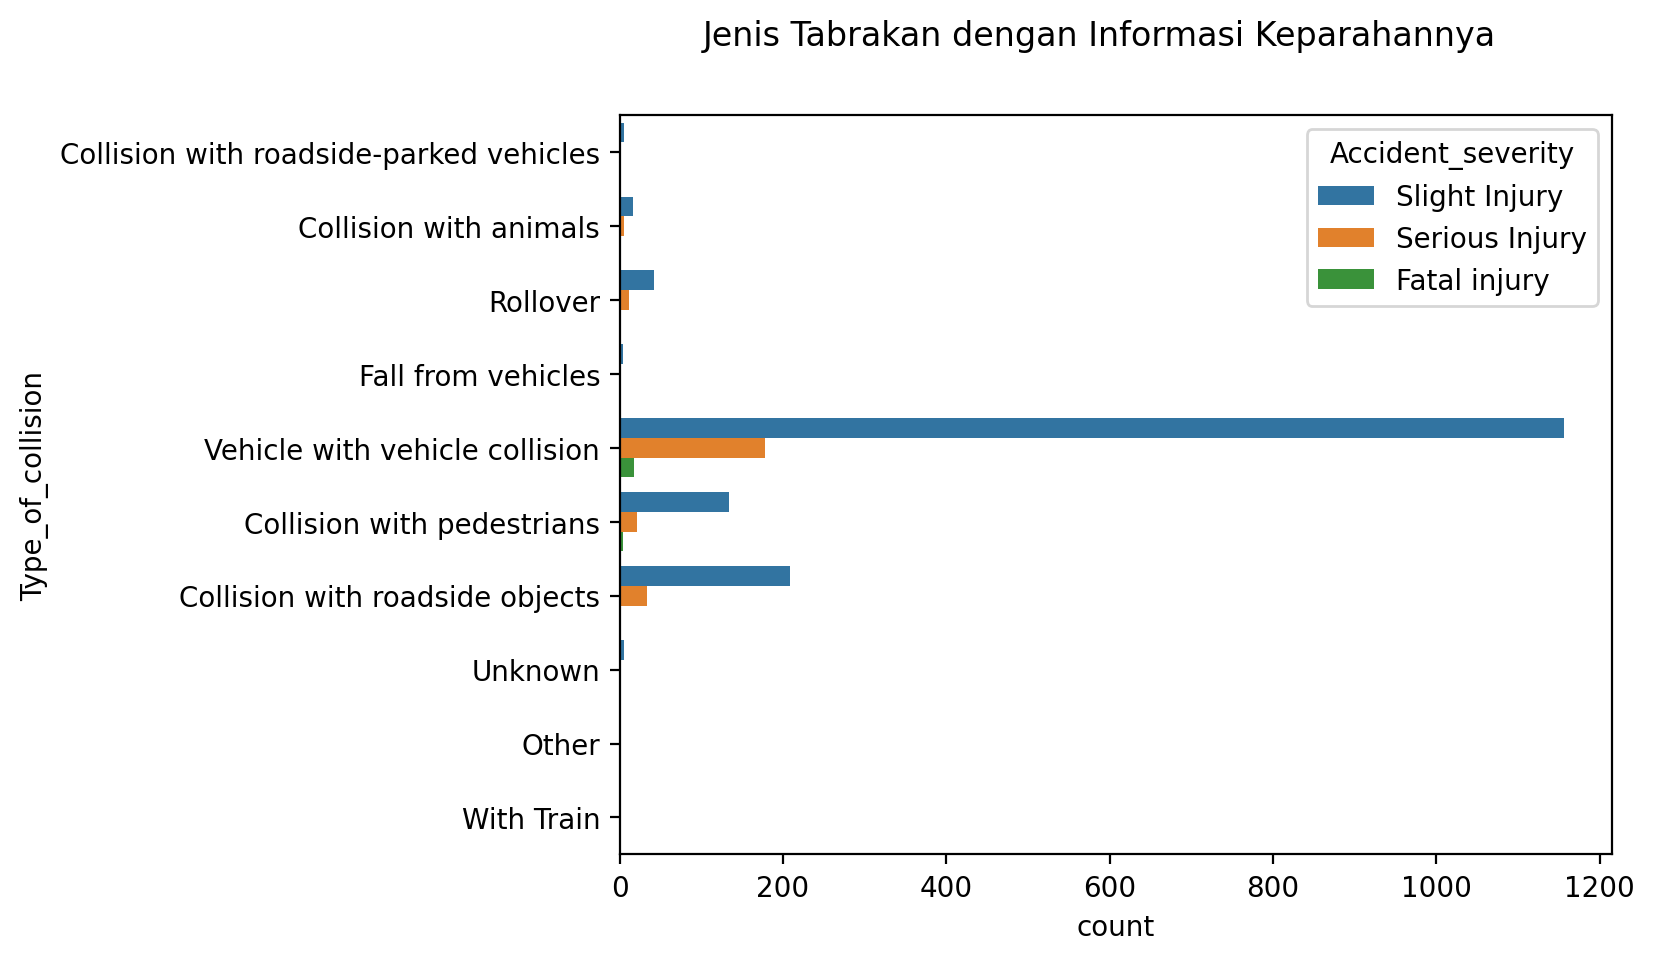

In [67]:
sns.countplot(data=analysis_df, y = "Type_of_collision",  hue = "Accident_severity")
plt.suptitle('Jenis Tabrakan dengan Informasi Keparahannya')
plt.savefig('type_collision_accident_severity.png', bbox_inches='tight')

In [68]:
contigency_table_type_col = pd.crosstab(analysis_df['Accident_severity'], analysis_df['Type_of_collision'])
c1, p1, dof1, expected1 = chi2_contingency(contigency_table_type_col)

print(contigency_table_type_col)
print(f"p-value Type_of_collision - Accident_severity = {p1}")

Type_of_collision  Collision with animals  Collision with pedestrians  \
Accident_severity                                                       
Fatal injury                            0                           4   
Serious Injury                          5                          21   
Slight Injury                          16                         134   

Type_of_collision  Collision with roadside objects  \
Accident_severity                                    
Fatal injury                                     2   
Serious Injury                                  33   
Slight Injury                                  208   

Type_of_collision  Collision with roadside-parked vehicles  \
Accident_severity                                            
Fatal injury                                             0   
Serious Injury                                           1   
Slight Injury                                            5   

Type_of_collision  Fall from vehicles  Other  Rollov

Dari p-value, disimpulkan bahwa tidak ada bukti empiris yang menunjukkan adanya korelasi antara jenis tabrakan dengan tingkat keparahan kecelakaan.

#### **Mini RQ 3: Apakah ada korelasi antara jumlah korban dengan tingkat keparahan kecelakaan? Jika ada, seberapa kuat hubungannya?**

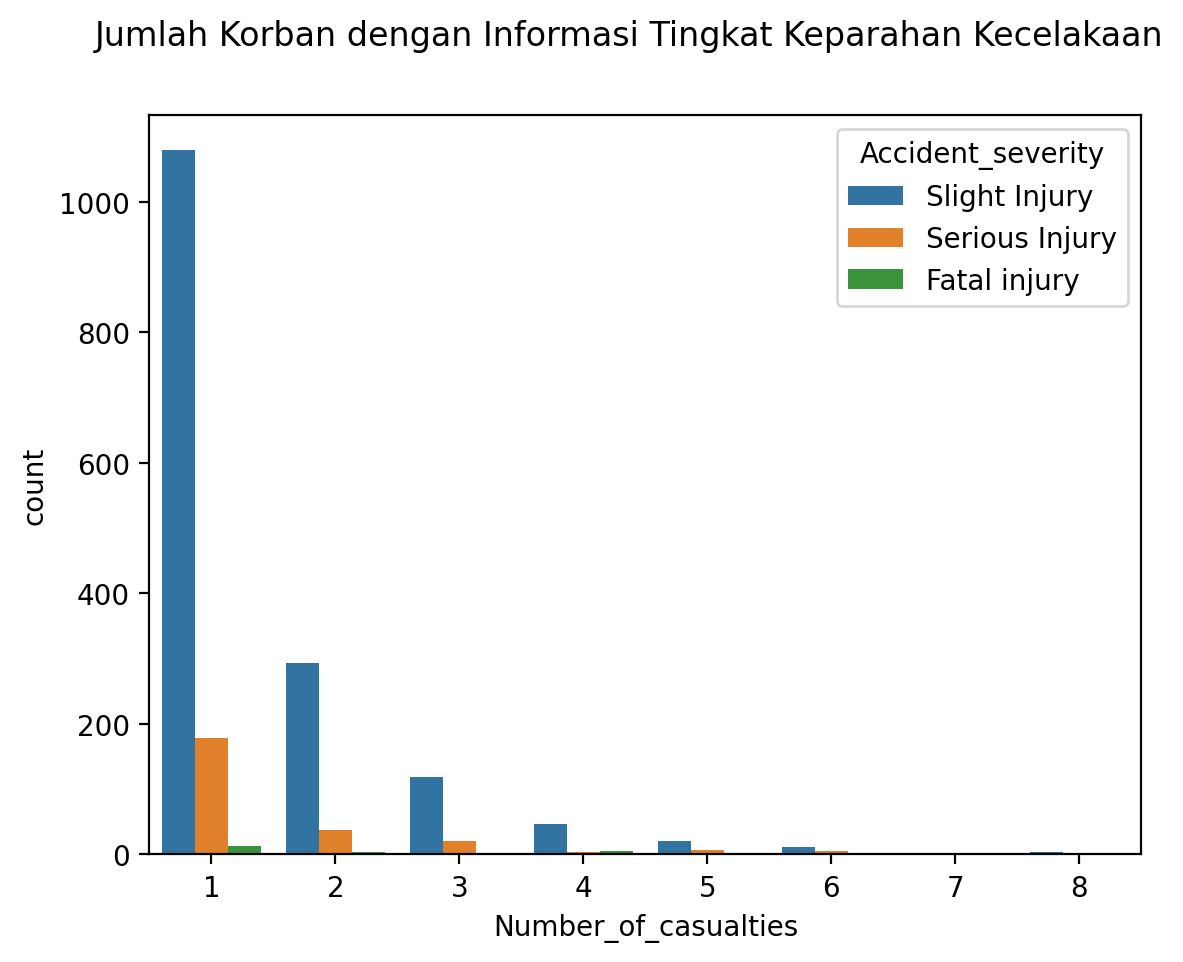

In [69]:
sns.countplot(data=analysis_df, x = "Number_of_casualties",  hue = "Accident_severity")
plt.suptitle('Jumlah Korban dengan Informasi Tingkat Keparahan Kecelakaan')
plt.savefig('num_of_casualties_with_severity.png', bbox_inches='tight')

Bisa dilihat distribusinya mayoritas adalah pada jumlah kasualitas 1. Lalu, jenis keparahan ringan mendominasi di semua jumlah kasualitas.

In [70]:
contigency_table_num_casualty = pd.crosstab(analysis_df['Accident_severity'], analysis_df['Number_of_casualties'])
c1, p1, dof1, expected1 = chi2_contingency(contigency_table_num_casualty)

print(contigency_table_num_casualty)
print(f"p-value Number_of_casualties - Accident_severity = {p1}")

Number_of_casualties     1    2    3   4   5   6  7  8
Accident_severity                                     
Fatal injury            13    4    1   5   0   0  0  0
Serious Injury         178   37   21   3   7   5  0  0
Slight Injury         1079  293  118  46  21  11  2  3
p-value Number_of_casualties - Accident_severity = 0.00012095518321407566


Dari p-value yang ada dapat dilihat terdapat bukti empiris yang menunjukkan adanya korelasi antara jumlah korban dengan tingkat keparahan kecelakaan. Untuk seberapa kuat hubungannya akan ditunjukkan dengan uji Cramer V.

In [71]:
n   = contigency_table_num_casualty.sum().sum()
dof = min(contigency_table_num_casualty.shape)-1
v   = np.sqrt(c1/(n*dof))
print(f"Cramer's value: {v} untuk Degree of Freedom: {dof}")

Cramer's value: 0.10670513090883317 untuk Degree of Freedom: 2


Kekuatan hubungannya bernilai **0.106** yang relatif kecil meskipun memang signifikan berdasarkan uji chi-squared.

#### **Mini RQ 4: Apakah ada korelasi antara tipe jalan dengan tingkat keparahan kecelakaan? Jika ada, seberapa kuat asosiasinya?**

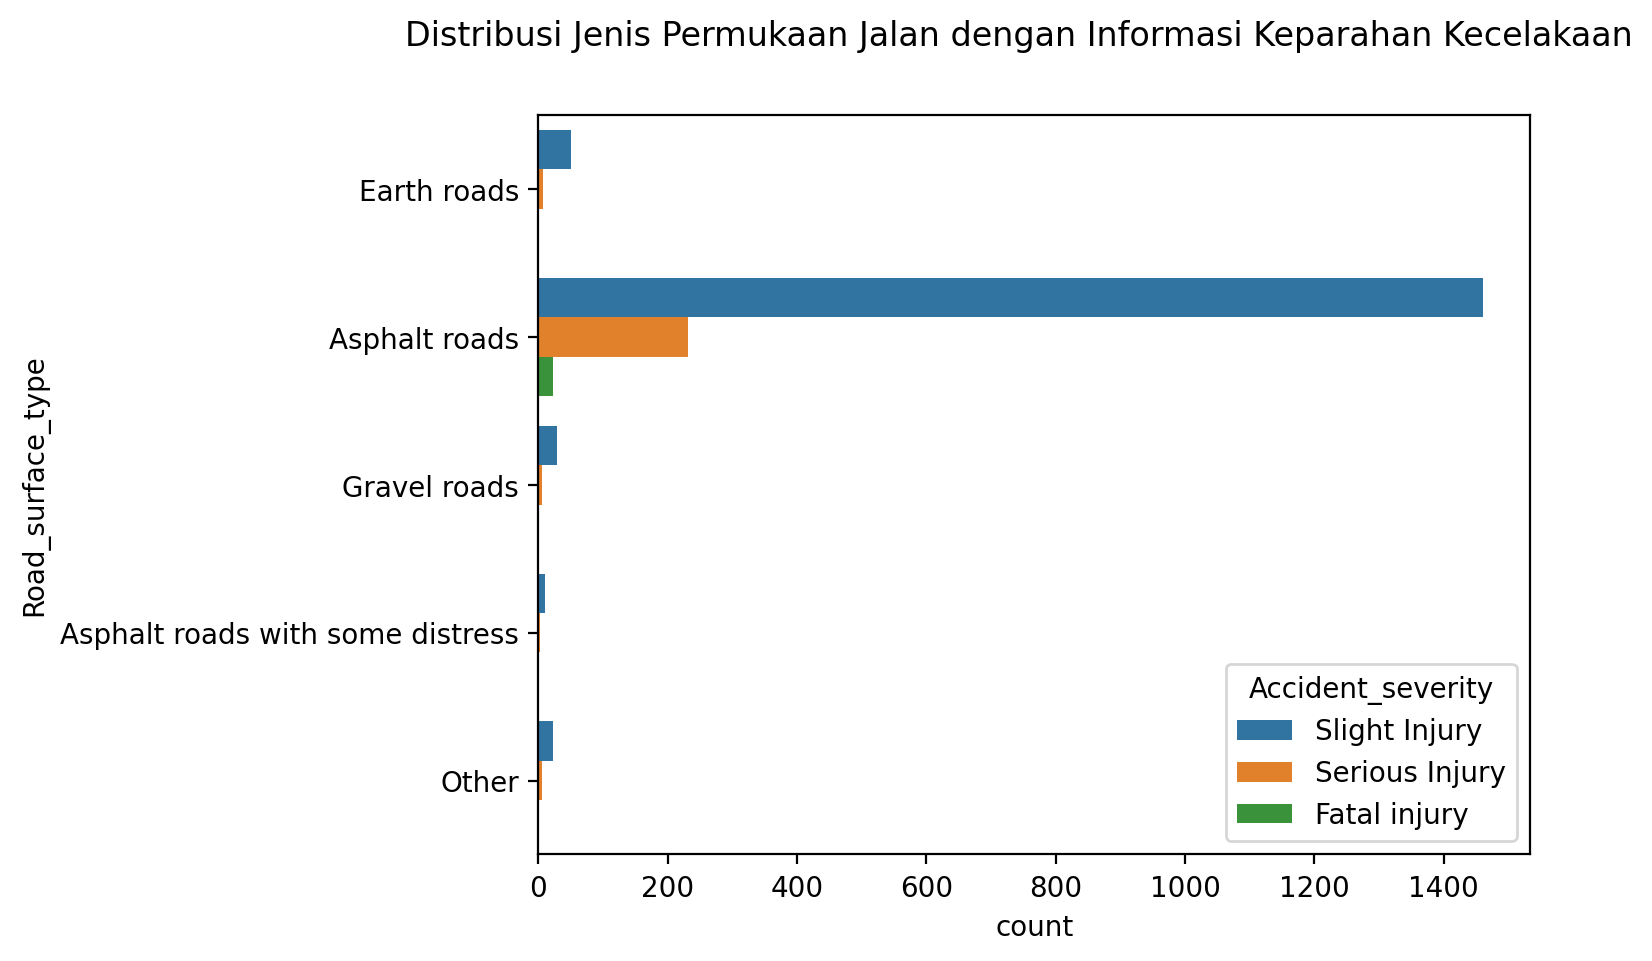

In [72]:
sns.countplot(data=analysis_df, y = "Road_surface_type",  hue = "Accident_severity")
plt.suptitle('Distribusi Jenis Permukaan Jalan dengan Informasi Keparahan Kecelakaan')
plt.savefig('dist_surface_severity.png', bbox_inches='tight')

Bisa dilihat pada kondisi jalan aspal kecelakaan mayoritas terjadi. Selain itu, jenis keparahan ringan yang mendominasi sama seperti saat RQ sebelumnya. Namun, adakah korelasi? Akan dikuantifikasi

In [73]:
contigency_table_road_type = pd.crosstab(analysis_df['Accident_severity'], analysis_df['Road_surface_type'])
c1, p1, dof1, expected1 = chi2_contingency(contigency_table_road_type)

print(contigency_table_num_casualty)
print(f"p-value Road_surface_type - Accident_severity = {p1}")

Number_of_casualties     1    2    3   4   5   6  7  8
Accident_severity                                     
Fatal injury            13    4    1   5   0   0  0  0
Serious Injury         178   37   21   3   7   5  0  0
Slight Injury         1079  293  118  46  21  11  2  3
p-value Road_surface_type - Accident_severity = 0.9508622076479075


Dari p-value di atas, tidak ada bukti empiris yang menunjukkan adanya korelasi antara penyebab kecelakaan dengan tingkat keparahan kecelakaan.

## Pembuatan Model

In [74]:
analysis_df2 = rta_df.drop(rta_df[rta_df.eq('na').any(axis=1)].index).drop(rta_df[rta_df.eq('nan').any(axis=1)].index).dropna().reset_index(drop=True)
analysis_df2

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
1,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
2,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
3,8:20:00,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,5-10yrs,...,Going straight,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
4,15:10:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,...,Moving Backward,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,18:45:00,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Special vehicle,Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
1843,19:12:00,Tuesday,31-50,Male,Elementary school,Owner,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
1844,12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
1845,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury


In [75]:
# Calculate chi-square test statistic and p-values
p_values = {}
columns = analysis_df2.drop(columns=['Accident_severity']).columns  # Exclude the target variable

for column in columns:
    contingency_table = pd.crosstab(analysis_df2[column], analysis_df2['Accident_severity'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    p_values[column] = p_value

sorted_p_val = sorted(p_values.items(), key = lambda item: item[1])
sorted_p_val

[('Time', 3.4670223426586596e-16),
 ('Number_of_vehicles_involved', 1.185684645026853e-05),
 ('Number_of_casualties', 0.00012095518321407611),
 ('Day_of_week', 0.001490958105224801),
 ('Vehicle_movement', 0.016876152097896897),
 ('Light_conditions', 0.030024221238342988),
 ('Type_of_vehicle', 0.060497534472676744),
 ('Area_accident_occured', 0.11164494069924709),
 ('Types_of_Junction', 0.19461653256743233),
 ('Vehicle_driver_relation', 0.21676325325240944),
 ('Age_band_of_driver', 0.2989690117317507),
 ('Sex_of_casualty', 0.3497887478417819),
 ('Casualty_severity', 0.3644064691339441),
 ('Educational_level', 0.3673155599026718),
 ('Casualty_class', 0.4060841222989543),
 ('Driving_experience', 0.45550983469107487),
 ('Age_band_of_casualty', 0.4822912740237538),
 ('Owner_of_vehicle', 0.5120223879734394),
 ('Pedestrian_movement', 0.6334424198463005),
 ('Fitness_of_casuality', 0.745761818544188),
 ('Road_allignment', 0.834017065150077),
 ('Work_of_casuality', 0.8344092695311452),
 ('Weathe

In [76]:
# Mengambil kolom dengan p value < 0.05
correlated_col = [x for (x, _) in sorted_p_val[:6]]
correlated_col

['Time',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Day_of_week',
 'Vehicle_movement',
 'Light_conditions']

In [77]:
# Calculate categorical correlation scores
correlation_scores = {}
columns = correlated_col

for i, column in enumerate(columns):
    contigency_table = pd.crosstab(analysis_df['Accident_severity'], analysis_df[column])
    c1, p1, dof1, expected1 = chi2_contingency(contigency_table)
    n   = contigency_table_num_casualty.sum().sum()
    dof = min(contigency_table_num_casualty.shape)-1
    v   = np.sqrt(c1/(n*dof))
    correlation_scores[(column, 'Accident_severity')] = v

sorted_corr = sorted(correlation_scores.items(), key = lambda item: item[1], reverse=True)
sorted_corr

[(('Time', 'Accident_severity'), 0.6833924532909156),
 (('Number_of_casualties', 'Accident_severity'), 0.10670513090883317),
 (('Vehicle_movement', 'Accident_severity'), 0.10528562501171991),
 (('Number_of_vehicles_involved', 'Accident_severity'), 0.10519597434716232),
 (('Day_of_week', 'Accident_severity'), 0.09276740946347951),
 (('Light_conditions', 'Accident_severity'), 0.06148644732085969)]

In [78]:
all_correlated_col = correlated_col.copy()
all_correlated_col.append('Accident_severity')
all_correlated_col

['Time',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Day_of_week',
 'Vehicle_movement',
 'Light_conditions',
 'Accident_severity']

In [79]:
selected_df = analysis_df2.loc[:, all_correlated_col]
selected_df

,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week,Vehicle_movement,Light_conditions,Accident_severity
0,17:20:00,2,1,Friday,Going straight,Daylight,Slight Injury
1,17:20:00,2,1,Friday,U-Turn,Daylight,Serious Injury
2,17:45:00,2,2,Thursday,Going straight,Daylight,Serious Injury
3,8:20:00,2,1,Tuesday,Going straight,Daylight,Serious Injury
4,15:10:00,1,1,Thursday,Moving Backward,Daylight,Serious Injury
...,...,...,...,...,...,...,...
1842,18:45:00,2,4,Wednesday,Going straight,Daylight,Slight Injury
1843,19:12:00,1,1,Tuesday,Going straight,Daylight,Serious Injury
1844,12:48:00,2,1,Friday,Going straight,Daylight,Slight Injury
1845,13:55:00,1,1,Sunday,Other,Daylight,Serious Injury


In [80]:
from datetime import datetime

def time_to_sec(time_str: str):
    time_obj = datetime.strptime(time_str, '%H:%M:%S')
    seconds = (time_obj - time_obj.replace(hour=0, minute=0, second=0)).total_seconds()
    return seconds

print(time_to_sec('15:10:05'))

54605.0


In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

selected_df.loc[:,'Time'] = selected_df['Time'].apply(time_to_sec)
selected_df.loc[:,'Time'] = scaler.fit_transform(selected_df[['Time']])

selected_df

/tmp/ipykernel_20/3568891652.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  selected_df.loc[:,'Time'] = selected_df['Time'].apply(time_to_sec)


,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week,Vehicle_movement,Light_conditions,Accident_severity
0,0.723464,2,1,Friday,Going straight,Daylight,Slight Injury
1,0.723464,2,1,Friday,U-Turn,Daylight,Serious Injury
2,0.740922,2,2,Thursday,Going straight,Daylight,Serious Injury
3,0.346369,2,1,Tuesday,Going straight,Daylight,Serious Injury
4,0.632682,1,1,Thursday,Moving Backward,Daylight,Serious Injury
...,...,...,...,...,...,...,...
1842,0.782821,2,4,Wednesday,Going straight,Daylight,Slight Injury
1843,0.801676,1,1,Tuesday,Going straight,Daylight,Serious Injury
1844,0.533520,2,1,Friday,Going straight,Daylight,Slight Injury
1845,0.580307,1,1,Sunday,Other,Daylight,Serious Injury


In [82]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_values = encoder.fit_transform(selected_df[['Day_of_week', 'Vehicle_movement']])

feature_names = encoder.categories_[0].tolist() + encoder.categories_[1].tolist()

encoded_df = pd.DataFrame(encoded_values, columns=feature_names)
selected_df[encoded_df.columns] = encoded_df

selected_df.drop(columns=['Day_of_week', 'Vehicle_movement'], inplace=True)
selected_df

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Time,Number_of_vehicles_involved,Number_of_casualties,Light_conditions,Accident_severity,Friday,Monday,Saturday,Sunday,Thursday,...,Moving Backward,Other,Overtaking,Parked,Reversing,Stopping,Turnover,U-Turn,Unknown,Waiting to go
0,0.723464,2,1,Daylight,Slight Injury,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.723464,2,1,Daylight,Serious Injury,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.740922,2,2,Daylight,Serious Injury,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.346369,2,1,Daylight,Serious Injury,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.632682,1,1,Daylight,Serious Injury,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,0.782821,2,4,Daylight,Slight Injury,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1843,0.801676,1,1,Daylight,Serious Injury,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844,0.533520,2,1,Daylight,Slight Injury,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1845,0.580307,1,1,Daylight,Serious Injury,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
selected_df['Light_conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - no lighting',
       'Darkness - lights unlit'], dtype=object)

In [84]:
light_label_map = {
    'Darkness - no lighting': 0, 
    'Darkness - lights unlit': 0, 
    'Darkness - lights lit': 1,
    'Daylight': 2
}

selected_df['Light_conditions']  = selected_df['Light_conditions'].map(light_label_map)
selected_df['Accident_severity'] = selected_df['Accident_severity'].map(label_map)
selected_df

,Time,Number_of_vehicles_involved,Number_of_casualties,Light_conditions,Accident_severity,Friday,Monday,Saturday,Sunday,Thursday,...,Moving Backward,Other,Overtaking,Parked,Reversing,Stopping,Turnover,U-Turn,Unknown,Waiting to go
0,0.723464,2,1,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.723464,2,1,2,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.740922,2,2,2,2,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.346369,2,1,2,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.632682,1,1,2,2,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,0.782821,2,4,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1843,0.801676,1,1,2,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844,0.533520,2,1,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1845,0.580307,1,1,2,2,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Melakukan teknik oversampling yang dikarenakan ketimpangan pada persebaran jumlah data yang ada berdasarkan fitur target yang ada.

In [85]:
from imblearn.over_sampling import SMOTE

X = selected_df.drop('Accident_severity', axis=1)
y = selected_df['Accident_severity']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Accident_severity'] = y_resampled

combined_df = pd.concat([selected_df, resampled_df], ignore_index=True)

print(len(resampled_df)+len(selected_df))
print(len(combined_df))

6566
6566


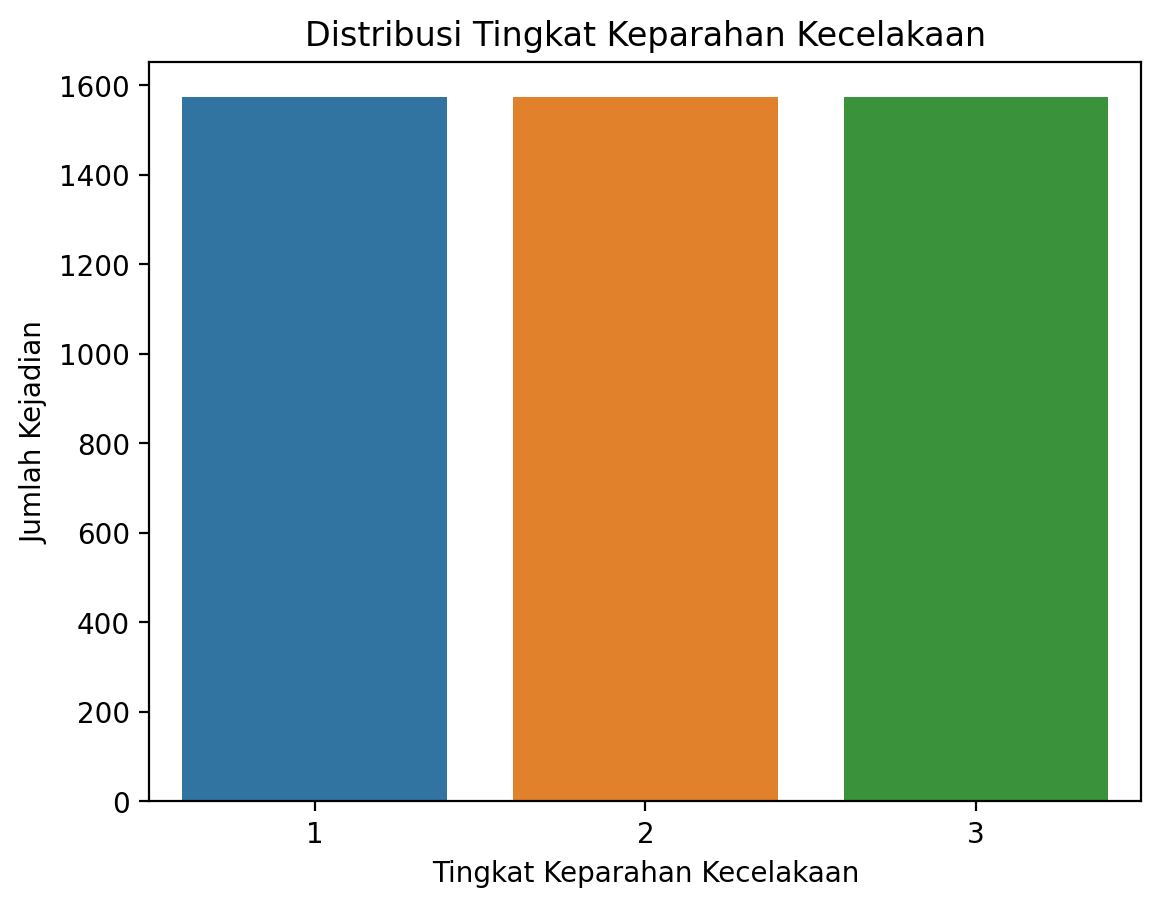

In [86]:
sns.countplot(x='Accident_severity', data=resampled_df)
plt.xlabel('Tingkat Keparahan Kecelakaan')
plt.ylabel('Jumlah Kejadian')
plt.title('Distribusi Tingkat Keparahan Kecelakaan')
plt.savefig('sebaran_kelas_keparahan_kecelakaan.png', bbox_inches='tight')

In [87]:
from sklearn.feature_selection import SelectKBest, chi2

X = resampled_df.drop(columns=['Accident_severity'])
y = resampled_df['Accident_severity']

selector = SelectKBest(chi2, k=10)  
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
selected_features

Index(['Number_of_vehicles_involved', 'Light_conditions', 'Friday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Getting off', 'Overtaking',
       'Waiting to go'],
      dtype='object')

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 3, 2, 2, 1, 2, 2, 2, 1, 3, 1, 1, 2, 2, 1, 3, 3, 3, 3, 3, 1, 2,
       3, 3, 1, 2, 3, 3, 2, 2, 2, 1, 3, 3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 3,
       3, 1, 1, 2, 2, 3, 3, 1, 3, 1, 2, 2, 3, 1, 2, 3, 1, 3, 1, 1, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1,
       1, 2, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 2, 2, 3, 2, 3, 3, 1, 3, 3, 2,
       2, 3, 2, 1, 1, 3, 3, 3, 3, 1, 2, 2, 2, 1, 2, 1, 3, 1, 2, 2, 3, 3,
       1, 3, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 1,
       3, 2, 3, 1, 1, 3, 3, 2, 1, 3, 3, 1, 2, 1, 1, 3, 3, 2, 1, 2, 1, 1,
       1, 3, 3, 2, 1, 1, 2, 3, 2, 2, 1, 2, 1, 2, 3, 1, 3, 2, 2, 1, 1, 3,
       1, 3, 1, 1, 3, 3, 1, 3, 2, 1, 2, 3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1,
       1, 1, 3, 3, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1,
       2, 3, 2, 3, 2, 1, 2, 2, 1, 2, 1, 3, 1, 2, 1,

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8527542372881356


In [90]:
from sklearn.model_selection import cross_val_score
rf_scores = cross_val_score(model, X, y, cv=5)

print(f"Random Forest Classifier Cross-validation scores: {rf_scores}")
print(f"Average score: {rf_scores.mean():.4f}")

Random Forest Classifier Cross-validation scores: [0.80614407 0.84427966 0.85381356 0.84957627 0.86108165]
Average score: 0.8430
